# Imports

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
#from pandas_profiling import ProfileReport

In [2]:
print(pd.__version__)

1.4.1


In [3]:
pip install colorcet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import colorcet as cc
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LogColorMapper

In [5]:
#conn = sqlite3.connect("data\data_wildfire_usa.sqlite")

conn = sqlite3.connect('FPA_FOD_20170508.sqlite') 

# Connection données PAULO

pat = r'C:\Users\paulo\OneDrive\Documentos\DATASCIENTEST\Project'
database = pat + '\FPA_FOD_20170508.sqlite'
conn = sqlite3.connect(database)
print("Connection Successful",conn)

Connection Successful <sqlite3.Connection object at 0x000001393B0DF6C0>


In [6]:
#fires = pd.read_sql_query("SELECT * FROM fires", conn)

fires est un tableau comprenant des données sur les incendies de forêt pour la période 1992-2015 compilées à partir des systèmes de déclaration fédéraux, étatiques et locaux des États-Unis.

In [7]:
#fires.info()

In [8]:
#fires.head()

# Description des variables

1.   OBJECTID : ID : donnée a priori non nécessaire pour notre étude

2.   FOD_ID : Identificateur unique global qui ressemble à l'OBJECTID 

3.   FPA_ID : Identificateur unique nécessaires pour remonter jusqu'à l'enregistrement d'origine 

4.   SOURCE_SYSTEM_TYPE : Type de données source ou système d'où provient l'enregistrement (fédéral, non fédéral ou interagence) 

5.   SOURCE_SYSTEM : Nom ou autre identifiant de la données source ou système d'où provient l'enregistrement 

6.   NWCG_REPORTING_AGENCY : Active National Wildlife Coordinating Group = Groupe national de coordination de la faune. Identifiant d'unité pour l'agence qui prépare le rapport d'incendie.
  *   BIA = Bureau of Indian Affairs 
  *   BLM = Bureau of Land Management
  *   BOR = Bureau of Reclamation
  *   DOD = Department of Defense
  *   DOE = Department of Energy
  *   FS = Forest Service
  *   FWS = Fish and Wildlife Service
  *   IA = Interagency Organization
  *   NPS = National Park Service
  *   ST/C&L = State, County, or Local Organization
  *   TRIBE = Tribal Organization

7.   NWCG_REPORTING_UNIT_ID : Identifiant d'unité NWCG actif pour l'unité préparant le rapport d'incendie 

8.   NWCG_REPORTING_UNIT_NAME : Nom d'unité NWCG actif pour l'unité préparant le rapport d'incendie

9.   SOURCE_REPORTING_UNIT : Code de l'unité d'agence préparant le rapport d'incendie, basé sur le code/nom dans les données source 

10.  SOURCE_REPORTING_UNIT_NAME : Nom de l'unité de l'agence déclarante préparant le rapport d'incendie, basé sur le code/nom des données source 

11.  LOCAL_FIRE_REPORT_ID : Numéro ou code qui identifie de manière unique un rapport d'incident pour une unité de déclaration particulière et une année civile particulière 

12.  LOCAL_INCIDENT_ID : Numéro ou code qui identifie de manière unique un incident pour une organisation locale de gestion des incendies particulière au cours d'une année civile donnée 

13.  FIRE_CODE : code utilisé au sein de la communauté inter-agences des feux de forêt pour suivre et compiler les informations sur les coûts de la suppression des incendies d'urgence

14.  FIRE_NAME : Nom de l'incident, tiré du rapport d'incendie (primaire) ou du rapport ICS-209 (secondaire)

15.  ICS_209_INCIDENT_NUMBER : Identifiant d'incident (événement), issu du rapport ICS-209. 

16.  ICS_209_NAME : Nom de l'incident, tiré du rapport ICS-209. 

17.  MTBS_ID : Identifiant d'incident, à partir de l'ensemble de données de périmètre MTBS. 

18.  MTBS_FIRE_NAME : Nom de l'incident, issu de l'ensemble de données de périmètre MTBS. 

19.  COMPLEX_NAME : Nom du complexe sous lequel l'incendie a finalement été maîtrisé, lorsqu'il est discernable. 

20.  FIRE_YEAR : Année civile au cours de laquelle l'incendie a été découvert ou confirmé. 

21.  DISCOVERY_DATE : Date à laquelle l'incendie a été découvert ou confirmé. 

22.  DISCOVERY_DOY : Jour de l'année où l'incendie a été découvert ou confirmé. 

23.  DISCOVERY_TIME : Heure de la journée à laquelle l'incendie a été découvert ou confirmé. 
            
24.  STAT_CAUSE_CODE : Code de la cause (statistique) de l'incendie.

25.  STAT_CAUSE_DESCR : Description de la cause (statistique) de l'incendie. 

26.  CONT_DATE : Date à laquelle l'incendie a été déclaré maîtrisé ou autrement maîtrisé (mm/jj/aaaa où mm=mois, jj=jour et aaaa=année). 

27.  CONT_DOY : Jour de l'année où l'incendie a été déclaré maîtrisé ou autrement maîtrisé. 

28.  CONT_TIME : Heure de la journée à laquelle l'incendie a été déclaré maîtrisé ou maîtrisé (hhmm où hh=heure, mm=minutes). *

29.  FIRE_SIZE : Estimation des acres dans le périmètre final du feu. (1 acre anglo-saxon = 40,47 ares). 

30.  FIRE_SIZE_CLASS : Code de la taille du feu basé sur le nombre d'acres dans les dépenses finales du périmètre d'incendie
  *   A = > 0 et <= 0,25 acre
  *   B = 0,26 à 9,9 acres
  *   C = 10,0 à 99,9 acres
  *   D = 100 à 299 acres
  *   E = 300 à 999 acres
  *   F = 1000 à 4999 acres
  *   G = 5000+ acres

31.  LATITUDE : Latitude (NAD83) pour l'emplacement ponctuel de l'incendie (degrés décimaux). 

32.  LONGITUDE : Longitude (NAD83) pour l'emplacement ponctuel de l'incendie (degrés décimaux). 

33.  OWNER_CODE : Code du propriétaire principal ou de l'entité responsable de la gestion du terrain au point d'origine de l'incendie au moment de l'incident.

34.  OWNER_DESCR : Nom du propriétaire principal ou de l'entité responsable de la gestion du terrain au point d'origine de l'incendie au moment de l'incident

35.  STATE : Code alphabétique à deux lettres de l'état dans lequel l'incendie a brûlé (ou s'est déclaré), basé sur la désignation nominale dans le rapport d'incendie. 

(AK=Alaska, AL=Alabama, AR=Arkansas, AZ=Arizona, CA=California, CO=Colorado, CT=Connecticut, DE=Delaware, DHS=Department of Homeland Security, DOC= Department of Commerce, DOD=Department of Defense, DOE=Department of Energy, DOI= Department of Interior, DOL=Department of Labor, FL=Florida, GA=Georgia, HI=Hawai, IA=Iowa, IA/GC=Non-Departmental Agencies, ID=Idaho, IL=Illinois, IN=Indiana, KS=Kansas, KY=Kentucky, LA=Louisiana, MA=Massachusetts, MD=Maryland, ME=Maine, MI=Michigan, MN=Minnesota, MO=Missouri, MS=Mississippi, MT=Montana, NC=North Carolina, NE=Nebraska, NG=Non-Government, NH=New Hampshire, NJ=New Jersey, NM=New Mexico, NV=Nevada, NY=New York, OH=Ohio, OK=Oklahoma, OR=Oregon, PA=Pennsylvania, PR=Puerto Rico, RI=Rhode Island, SC=South Carolina, SD=South Dakota, ST/L=State or Local Government, TN=Tennessee, Tribe=Tribe, TX=Texas, USDA=Department of Agriculture, UT=Utah, VA=Virginia, VI=U. S. Virgin Islands, VT=Vermont, WA=Washington, WI=Wisconsin, WV=West Virginia, WY=Wyoming).

36.  COUNTY : Comté, ou équivalent, dans lequel l'incendie s'est déclaré (ou a pris naissance), en fonction de la désignation nominale dans le rapport d'incendie.

37.  FIPS_CODE : Code à trois chiffres de la publication FIPS (Federal Information Process Standards) 6-4 pour la représentation des comtés et des entités équivalentes.

38.  FIPS_NAME : Nom du comté de la publication FIPS 6-4 pour la représentation des comtés et des entités équivalentes

39.  Shape : donnée inutile

# Statistiques générales

In [9]:
# Statistiques au format html
#prof = ProfileReport(fires)
#prof.to_file(output_file='rapport.html')

In [10]:
# Affichage des statistiques dans le notebook via la librairie pandas_profiling
#profile = ProfileReport(fires, title='Analyse du fichier WildFire', html={'style':{'full_width':True}})
#profile.to_notebook_iframe()

Suite à la méthode ProfileReport, nous pouvons déclarer :
- Sur 39 entrées : 14 sont des variables de tyme numérique, 24 de type catégorielle et 1 ne peut être exploitée
- Il y a 27% de valeurs manquantes dans le DataFrame
- Etant donné la part de valeurs manquantes dans les colonnes ICS_209_INCIDENT_NUMBER (98.6%), ICS_209_NAME (98.6%), MTBS_ID (99.4%), MTBS_FIRE_NAME (99.4%), COMPLEX_NAME (99.7%), ces colonnes ne seront pas utilisées pour l'étude.
- Il n'y a pas de doubons parfaits : les doublons seront à analyser en détail par colonne
- Certaines colonnes sont à haute cardinalité, c'est à dire qu'elles ont des contraintes (uniques) qui nous empêchent de les regrouper. 
- Les colonnes OBJECTID, FOD_ID et FPA_ID ont des valeurs uniques. FPA_ID a des valeurs disctintes à 99.9%, il faut analyser ce point.
- Pour certaines données, nous avons à la fois des codes et des libellés. Il faudra analyser s'il y a un lien entre ces données et si nous pouvons remplacer des valeurs manquantes.
- Certains formats de date ne sont pas lisibles

# Data Cleaning

In [11]:
# Le chargement du fichier initial est nécessaire dans cette cellule pour éviter tout message d'erreur ou mauvaise manipulation, si la cellule est ré-exécutée
fires = pd.read_sql_query("SELECT * FROM fires", conn)
# Suppression de la colonne Shape
fires = fires.drop(['Shape'], axis = 1)
# Renommage des colonnes : DAY à la place de DOY
fires = fires.rename(columns = {'DISCOVERY_DOY' : 'DISCOVERY_DAY', 'CONT_DOY' : 'CONT_DAY'})
fires.head()


OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE  \
0                  0511     Plumas National Forest  ...      0.10   
1                  0503   Eldorado National Forest  ...      0.25   
2                  0503   Eldorado National Forest  ...      0.10   
3                  0503   Eldorado National Forest  ...      0.10   
4                  0503   Eldorado National Forest  ...      0.10   

  FIRE_SIZE_CLASS   LATITUDE   LONGITUDE OWNER_CODE       OWNER_DESCR STATE  \
0               A  40.036944 -121.005833        5.0              USFS    CA   
1               A  38.933056 -120.404444        5.0              USFS    CA   
2               A  38.984167 -120.735556       13.0  STATE OR PRIVATE    CA   
3               A  38.559167 -119.913333        5.0              USFS    CA   
4               A  38.559167 -119.933056        5.0              USFS    CA   

  COUNTY FIPS_CODE  FIPS_NAME  
0     63       063     Plumas  
1     61       061     Placer  
2     17       017  El Dorado  
3      3       003     Alpine  
4      3       003     Alpine  

[5 rows x 38 columns]

## Examen du type/format de données

In [12]:
# Vérification de la colonne FIRE_YEAR
fires['FIRE_YEAR'].value_counts().sort_index()
# On a bien les années 1992 à 2015

1992     67975
1993     61989
1994     75955
1995     71472
1996     75574
1997     61450
1998     68370
1999     89363
2000     96416
2001     86587
2002     75656
2003     68261
2004     69279
2005     88604
2006    114004
2007     95573
2008     85378
2009     78325
2010     79889
2011     90552
2012     72769
2013     64780
2014     67753
2015     74491
Name: FIRE_YEAR, dtype: int64

In [13]:
# La colonne DISCOVERY_DATE n'est pas au bon format
# Changement du format de date de DISCOVERY_DATE
fires['DATE'] = pd.to_datetime(fires['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# Vérification succinte du format
print('Vérification format DATE avec la colonne FIRE_YEAR : \n', pd.DataFrame(fires['DATE']).join(fires['FIRE_YEAR']))

Vérification format DATE avec la colonne FIRE_YEAR : 
               DATE  FIRE_YEAR
0       2005-02-02       2005
1       2004-05-12       2004
2       2004-05-31       2004
3       2004-06-28       2004
4       2004-06-28       2004
...            ...        ...
1880460 2015-09-26       2015
1880461 2015-10-05       2015
1880462 2015-05-02       2015
1880463 2015-10-14       2015
1880464 2015-03-14       2015

[1880465 rows x 2 columns]


In [14]:
# La colonne CONT_DATE n'est pas au bon format et possède des valeurs manquantes
# Changement du format de date de CONT_DATE
fires['CONT_DATE_COR'] = pd.to_datetime(fires['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# Vérification du format
fires['CONT_DATE_COR']

0         2005-02-02
1         2004-05-12
2         2004-05-31
3         2004-07-03
4         2004-07-03
             ...    
1880460   2015-09-26
1880461          NaT
1880462          NaT
1880463          NaT
1880464          NaT
Name: CONT_DATE_COR, Length: 1880465, dtype: datetime64[ns]

In [15]:
fires[['DISCOVERY_DAY','CONT_DATE_COR']]

DISCOVERY_DAY CONT_DATE_COR
0                   33    2005-02-02
1                  133    2004-05-12
2                  152    2004-05-31
3                  180    2004-07-03
4                  180    2004-07-03
...                ...           ...
1880460            269    2015-09-26
1880461            278           NaT
1880462            122           NaT
1880463            287           NaT
1880464             73           NaT

[1880465 rows x 2 columns]

D'après le résulat de ProfileReport, la variable FIRE_YEAR est fortement corrélée avec les variables DISCOVERY_DATE et CONT_DATE.  
Si la variable CONT_DATE correspond à l'année de FIRE_YEAR, alors nous pouvons remplacer les 47.4% de valeurs manquantes de CONT_DATE par FIRE_YEAR

In [16]:
# On vérifie que CONT_DATE correspond à l'année de FIRE_YEAR
# Création d'une colonne et suppression des valeurs manquantes
fires['CONT_DATE_COR_INT'] = (fires['CONT_DATE_COR'].dt.year).fillna(0).astype(int)
# Différence entre CONT_DATE et FIRE_YEAR
fires['DIFF_YEAR'] = fires['CONT_DATE_COR_INT'] - fires['FIRE_YEAR']
# Vérification des différences entre les 2 colonnes
year = pd.DataFrame(fires['CONT_DATE_COR_INT']).join(fires['FIRE_YEAR']).join(fires['DIFF_YEAR'])
year.loc[(year['DIFF_YEAR']>0) & (year['DIFF_YEAR']<1992)].value_counts()


CONT_DATE_COR_INT  FIRE_YEAR  DIFF_YEAR
2011               2010       1            29
2013               2012       1            25
2015               2014       1            23
2006               2005       1            18
2008               2007       1            13
2009               2008       1            12
2003               2002       1            12
2005               2004       1             9
2002               2001       1             9
2004               2003       1             8
2000               1999       1             7
1995               1994       1             6
2007               2006       1             6
2012               2011       1             5
2009               2006       3             4
                   1999       10            4
2005               2003       2             4
1999               1998       1             4
1994               1993       1             4
2001               2000       1             3
1997               1996       1         

Au vu des écarts entre les dates, nous ne pouvons pas savoir s'il s'agit d'erreur ou bien s'il s'agit bien de l'année souhaitée.

Nous pouvons regarder la durée des feux avec les variables DATE (Date à laquelle l'incendie a été découvert) et CONT_DATE_COR (Date à laquelle l'incendie a été déclaré maîtrisé)

In [17]:
fires['DURATION'] = fires['CONT_DATE_COR'] - fires['DATE']
fires['DURATION'].value_counts().sort_values()

397 days          1
375 days          1
312 days          1
3652 days         1
368 days          1
              ...  
4 days         6772
3 days        11641
2 days        24476
1 days       104954
0 days       806199
Name: DURATION, Length: 314, dtype: int64

Nous remarquons que certains feux ont duré extrèmement longtemps,il est fort probable que ces données soient erronnées. Etant donné que nous ne savons pas si les données sont correctes, nous ne nous en préoccuperons pas. 

## Etude des variables similaires

En examinant les variables similaires, nous pouvons tenter de remplacer des valeurs manquantes par d'autres valeurs.

Est ce que la variable OBJECTID = FOD_ID ?

In [18]:
(fires.OBJECTID == fires.FOD_ID).value_counts()

False    1880393
True          72
dtype: int64

Les 2 colonnes semblent être identiques mais l'ID de FOD_ID est décalé à partir de l'index 72. 
A priori ces données ne sont pas nécessaires pour l'étude. On ne s'en préoccupera pas.

Est ce qu'une valeur donnée dans la colonne SOURCE_SYSTEM correspond à une valeur spécifique de la colonne SOURCE_SYSTEM_TYPE ?  
D'après le résultat de ProfileReport, la variable SOURCE_SYTEM_TYPE est fortement corrélée à la variable SOURCE_SYTEM. Cette dernière a 38 valeurs.

In [19]:
# Création DataFrame
source_sytem = pd.DataFrame(fires['SOURCE_SYSTEM_TYPE']).join(fires['SOURCE_SYSTEM'])
# On compte les doublons
print(source_sytem.duplicated().value_counts(), '\n')
print('On peut constater que la variable SOURCE_SYTEM a 39 valeurs et non 38')
# On regroupe les données par SOURCE_SYSTEM et on compte les valeurs de l'autre variable.
group_by_source_syst = source_sytem.groupby(['SOURCE_SYSTEM'], as_index = False).value_counts()
print('Résultat :')
group_by_source_syst

True     1880426
False         39
dtype: int64 

On peut constater que la variable SOURCE_SYTEM a 39 valeurs et non 38
Résultat :


SOURCE_SYSTEM SOURCE_SYSTEM_TYPE   count
0       DOI-WFMI                FED  241423
1       FA-NFIRS             NONFED    3387
2    FS-FIRESTAT                FED  220356
3       FWS-FMIS                FED   19327
4       IA-AKACC          INTERAGCY    3713
5       IA-HIWMO          INTERAGCY    9714
6      IA-ICS209          INTERAGCY    1982
7      IA-ICS209             NONFED       1
8      IA-PRIITF          INTERAGCY   21802
9       ST-ALALS             NONFED   54951
10      ST-ARARS             NONFED   11303
11      ST-AZAZS             NONFED    3446
12      ST-CACDF             NONFED   87355
13      ST-COCOS             NONFED    2433
14      ST-CTCTS             NONFED    3379
15      ST-FLFLS             NONFED   45077
16      ST-GAGAS             NONFED   65061
17      ST-KYKYS             NONFED    6519
18      ST-LALAS             NONFED   16172
19      ST-MEMES             NONFED    7252
20      ST-MIMIS             NONFED    2139
21      ST-MOMOS             NONFED    9835
22      ST-MSMSS             NONFED   60513
23      ST-MTMTS             NONFED    2737
24       ST-NASF             NONFED  711236
25      ST-NCNCS             NONFED   65695
26      ST-NENES             NONFED      17
27      ST-NMNMS             NONFED    4433
28      ST-OKOKS             NONFED   15397
29      ST-ORORS             NONFED   18121
30      ST-SCSCS             NONFED   49281
31      ST-SDSDS             NONFED    3181
32      ST-TNTNS             NONFED   14777
33      ST-TXTXS             NONFED   57945
34      ST-UTUTS             NONFED    4470
35      ST-VAVAS             NONFED   10575
36      ST-WAWAS             NONFED    9648
37      ST-WIWIS             NONFED   14323
38      ST-WYWYS             NONFED    1489

Nous remarquons que la donnée IA-ICS209 est en double et nous pouvons émettre l'hypothèse que certaines données peuvent être mal orthographiées.

Est ce qu'une valeur donnée dans la colonne NWCG_REPORTING_UNIT_ID correspond à une valeur spécifique de la colonne NWCG_REPORTING_UNIT_NAME ?  
D'après le résultat de ProfileReport, la variable NWCG_REPORTING_UNIT_ID est fortement corrélée à la variable NWCG_REPORTING_UNIT_NAME. Elles ont respectivement 1640 et 1635 valeurs.  
On en conclue qu'une valeur ID ne correspond pas a une seule valeur NAME

In [20]:
# Création DataFrame
reporting = pd.DataFrame(fires['NWCG_REPORTING_UNIT_ID']).join(fires['NWCG_REPORTING_UNIT_NAME'])
# On regroupe les données par NWCG_REPORTING_UNIT_ID puis on compte les valeurs de l'autre variable.
group_by_reporting = reporting.groupby(['NWCG_REPORTING_UNIT_ID'], as_index = False).value_counts()


In [21]:
# On s'intéresse aux doublons de NWCG_REPORTING_UNIT_NAME
reporting_doublon = group_by_reporting[group_by_reporting['NWCG_REPORTING_UNIT_NAME'].duplicated(keep = False) == True].sort_values(by ='NWCG_REPORTING_UNIT_NAME')
reporting_doublon

NWCG_REPORTING_UNIT_ID NWCG_REPORTING_UNIT_NAME  count
319                 USCOCUX            Custer County      8
1241                USSDCUX            Custer County      4
327                 USCODGX           Douglas County    226
1248                USSDDOX           Douglas County      8
392                 USCOJCX           Jackson County     22
1300                USSDJAX           Jackson County      1
406                 USCOLOX             Logan County      9
679                 USKSLGX             Logan County      1
313                 USCOCRD       Northwest District   5182
364                 USCOGJD       Northwest District   3781

Si NWCG_REPORTING_UNIT_NAME a des doublons il s'agit probablement d'une erreur dans le jeu de données ou d'un changement de code (dans le référentiel) en cours d'année.  
Pour une question d'homogénéité, nous pouvons remplacer ces données par celles qui sont les plus utilisées.

In [22]:
# Remplacement des valeurs doublons
fires['NWCG_REPORTING_UNIT_ID'] = fires['NWCG_REPORTING_UNIT_ID'].replace(['USSDCUX', 'USSDDOX', 'USSDJAX', 'USKSLGX', 'USCOGJD'],['USCOCUX', 'USCODGX', 'USCOJCX', 'USCOLOX', 'USCOCRD'])

D'après le résultat de ProfileReport, Les variables FIRE_CODE et FIRE_NAME sont à haute cardinalité et ont respectivement 82.7% et 50.9% de valeurs manquantes.  
Est ce qu'une valeur donnée dans la colonne FIRE_CODE correspond à une valeur spécifique de la colonne FIRE_NAME ?

In [23]:
# Création DataFrame
fires_code_name = pd.DataFrame(fires['FIRE_CODE']).join(fires['FIRE_NAME'])
# On compte les doublons
print(fires_code_name.duplicated().value_counts(), '\n')
# On regroupe les données par FIRE_NAME et on compte les valeurs de l'autre variable.
group_by = fires_code_name.groupby(['FIRE_NAME'], as_index = False).value_counts()
group_by[group_by['count'] > 1].sort_values(by = 'FIRE_NAME')


True     1187560
False     692905
dtype: int64 



FIRE_NAME FIRE_CODE  count
858         0118      EK2A      2
1276        0183      EK2A      2
1535        0227      EK2A      2
1679        0250      EK2A      2
1685        0251      EK2A      2
...          ...       ...    ...
312284       ZOT      DZ9H      2
312282       ZOT      EK15      5
312285       ZOT      6300      2
312304      ZULU      EKT1      2
312314   ZUMWALT      EKW2      2

[7326 rows x 3 columns]

Il en résulte qu'un code ne correspond pas systématiquement à un seul nom de feu. Un même code peut posséder plusieurs noms et inversement.  

Est ce qu'une valeur donnée dans la colonne SOURCE_REPORTING_UNIT correspond à une valeur spécifique de la colonne SOURCE_REPORTING_UNIT_NAME ?

In [24]:
# Création DataFrame
source_reporting = pd.DataFrame(fires['SOURCE_REPORTING_UNIT']).join(fires['SOURCE_REPORTING_UNIT_NAME'])
# On compte les doublons
print(source_reporting.duplicated().value_counts(), '\n')
# On regroupe les données
group_by_source_reporting = source_reporting.groupby(['SOURCE_REPORTING_UNIT'], as_index = False).value_counts().sort_values(by = 'SOURCE_REPORTING_UNIT')

True     1873584
False       6881
dtype: int64 



In [25]:
# On s'intéresse aux doublons
source_reporting_doublon = group_by_source_reporting[group_by_source_reporting['SOURCE_REPORTING_UNIT_NAME'].duplicated() == True].sort_values(by ='SOURCE_REPORTING_UNIT_NAME')
source_reporting_doublon


SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  count
6523               USMNAGR                AGASSIZ NWR      2
6469               USCOALR                ALAMOSA NWR      1
6545               USNCALR          ALLIGATOR RIV NWR      8
6602               USTXAHR                ANAHUAC NWR     10
6603               USTXARR                ARANSAS NWR      1
...                    ...                        ...    ...
6803   WI Wisconsin Rapids  Wisconsin Rapids District   1133
6804           WI Woodruff          Woodruff District    917
6878                 WYWYS     Wyoming State Forestry   2143
6438               USAKYDR            YUKON DELTA NWR     20
6439               USAKYFR            YUKON FLATS NWR     10

[2440 rows x 3 columns]

Pour cette variable également on s'aperçoit qu'un code ne correspond pas à un seul nom et inversement.

In [26]:
# Pour limiter les doublons, nous allons convertir les données de SOURCE_REPORTING_UNIT_NAME en majuscule
fires["SOURCE_REPORTING_UNIT_NAME"] = fires["SOURCE_REPORTING_UNIT_NAME"].str.upper()

Est ce qu'une valeur donnée dans la colonne STAT_CAUSE_CODE correspond à une valeur spécifique de la colonne STAT_CAUSE_DESCR ?

In [27]:
# Création DataFrame
stat_cause = pd.DataFrame(fires['STAT_CAUSE_CODE']).join(fires['STAT_CAUSE_DESCR'])
# On compte les doublons
print(stat_cause.duplicated().value_counts(), '\n')
# On regroupe les données
group_by_stat = stat_cause.groupby(['STAT_CAUSE_CODE'], as_index = False).value_counts()
group_by_stat

True     1880452
False         13
dtype: int64 



STAT_CAUSE_CODE   STAT_CAUSE_DESCR   count
0               1.0          Lightning  278468
1               2.0      Equipment Use  147612
2               3.0            Smoking   52869
3               4.0           Campfire   76139
4               5.0     Debris Burning  429028
5               6.0           Railroad   33455
6               7.0              Arson  281455
7               8.0           Children   61167
8               9.0      Miscellaneous  323805
9              10.0          Fireworks   11500
10             11.0          Powerline   14448
11             12.0          Structure    3796
12             13.0  Missing/Undefined  166723

La variable STAT_CAUSE_CODE correspond à une donnée de STAT_CAUSE_DESCR

Est ce qu'une valeur donnée dans la colonne OWNER_CODE correspond à une valeur spécifique de la colonne OWNER_DESCR ?

In [28]:
# Création DataFrame
owner = pd.DataFrame(fires['OWNER_CODE']).join(fires['OWNER_DESCR'])
# On compte les doublons
print(owner.duplicated().value_counts(), '\n')
# On regroupe les données
group_by_owner = owner.groupby(['OWNER_CODE'], as_index = False).value_counts()
group_by_owner

True     1880449
False         16
dtype: int64 



OWNER_CODE            OWNER_DESCR    count
0          0.0                FOREIGN       15
1          1.0                    BLM    63278
2          2.0                    BIA   106819
3          3.0                    NPS    17524
4          4.0                    FWS    12191
5          5.0                   USFS   188338
6          6.0          OTHER FEDERAL     6452
7          7.0                  STATE    30790
8          8.0                PRIVATE   314822
9          9.0                 TRIBAL     8952
10        10.0                    BOR      285
11        11.0                 COUNTY     1841
12        12.0        MUNICIPAL/LOCAL     4236
13        13.0       STATE OR PRIVATE    71881
14        14.0  MISSING/NOT SPECIFIED  1050835
15        15.0      UNDEFINED FEDERAL     2206

La variable OWNER_CODE correspond à une donnée de OWNER_DESCR

Est ce qu'une valeur donnée dans la colonne FIPS_CODE correspond à une valeur spécifique de la colonne FIPS_NAME ?

In [29]:
# Création DataFrame
fips = pd.DataFrame(fires['FIPS_CODE']).join(fires['FIPS_NAME'])
# On compte les doublons
print(fips.duplicated().value_counts(), '\n')
# On regroupe les données
group_by_fips = fips.groupby(['FIPS_CODE'], as_index = False).value_counts()
group_by_fips

True     1877769
False       2696
dtype: int64 



FIPS_CODE            FIPS_NAME  count
0          001             Atlantic   3237
1          001                Adair   2828
2          001               Albany   2395
3          001                Adams   2140
4          001             Anderson   2080
...        ...                  ...    ...
2690       730      Petersburg City      2
2691       760      Richmond (city)      1
2692       800         Suffolk City     49
2693       810  Virginia Beach City     17
2694       810  Virginia Beach city      2

[2695 rows x 3 columns]

Pour cette variable, on s'aperçoit qu'un code ne correspond pas à un seul nom et inversement.

Nous pouvons vérifier si la variable FIRE_SIZE_CLASS correspond à la variable FIRE_SIZE

In [30]:
# Création d'une colonne
fires['FIRE_SIZE_CLASS_TEST'] = 0
# Création d'une liste de condition
conditionlist = [
    (fires['FIRE_SIZE'] <= 0.25),
    (fires['FIRE_SIZE'] >0.25) & (fires['FIRE_SIZE']<10),
    (fires['FIRE_SIZE'] >=10) & (fires['FIRE_SIZE'] <100),
    (fires['FIRE_SIZE'] >=100) & (fires['FIRE_SIZE'] <300),
    (fires['FIRE_SIZE'] >=300) & (fires['FIRE_SIZE'] <1000),
    (fires['FIRE_SIZE'] >=1000) & (fires['FIRE_SIZE'] <5000),
    (fires['FIRE_SIZE']>=5000)]

# Création d'une liste de choix
choicelist = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Comparaison avec la colonne existante
fires['FIRE_SIZE_CLASS_TEST'] = np.select(conditionlist, choicelist)
(fires['FIRE_SIZE_CLASS_TEST'] == fires['FIRE_SIZE_CLASS']).value_counts()


True    1880465
dtype: int64

La colonne FIRE_SIZE_CLASS est conforme à la colonne FIRE_SIZE

## Examen des doublons

L'examen des doublons sur l'ensemble des colonnes du DataFrame peut se faire directement avec les résulats de ProfileReport.  
Cependant, pour plus de clareté nous allons détailler certains points

In [31]:
# Création d'un dictionnaire regroupant les colonnes et le nombre de doublons par colonne
doublons = {}
for col in fires.columns :
    duplicates = fires[col].duplicated().sum()
    doublons[col] = duplicates

doublons

{'OBJECTID': 0,
 'FOD_ID': 0,
 'FPA_ID': 3,
 'SOURCE_SYSTEM_TYPE': 1880462,
 'SOURCE_SYSTEM': 1880427,
 'NWCG_REPORTING_AGENCY': 1880454,
 'NWCG_REPORTING_UNIT_ID': 1878830,
 'NWCG_REPORTING_UNIT_NAME': 1878830,
 'SOURCE_REPORTING_UNIT': 1875473,
 'SOURCE_REPORTING_UNIT_NAME': 1876258,
 'LOCAL_FIRE_REPORT_ID': 1866956,
 'LOCAL_INCIDENT_ID': 1314550,
 'FIRE_CODE': 1708018,
 'FIRE_NAME': 1386831,
 'ICS_209_INCIDENT_NUMBER': 1857727,
 'ICS_209_NAME': 1860891,
 'MTBS_ID': 1869983,
 'MTBS_FIRE_NAME': 1872331,
 'COMPLEX_NAME': 1879048,
 'FIRE_YEAR': 1880441,
 'DISCOVERY_DATE': 1871699,
 'DISCOVERY_DAY': 1880099,
 'DISCOVERY_TIME': 1879024,
 'STAT_CAUSE_CODE': 1880452,
 'STAT_CAUSE_DESCR': 1880452,
 'CONT_DATE': 1871704,
 'CONT_DAY': 1880098,
 'CONT_TIME': 1879023,
 'FIRE_SIZE': 1866828,
 'FIRE_SIZE_CLASS': 1880458,
 'LATITUDE': 986404,
 'LONGITUDE': 882929,
 'OWNER_CODE': 1880449,
 'OWNER_DESCR': 1880449,
 'STATE': 1880413,
 'COUNTY': 1877009,
 'FIPS_CODE': 1880179,
 'FIPS_NAME': 1878766,
 '

Le résultat de ce dictionnaire nous indique plusieurs choses :
1. Pour la plupart des variables, il n'existe que très peu de données distinctes car il y a beaucoup de doublons.
2. Pour les variables uniques :
    - telles que OBJECTID et FOD_ID, il n'existe pas de doublons. Il n'y a donc pas d'erreur dans ces données car elles sont uniques (en lien avec les résultats de la méthode ProfileReport).
    - En revanche, pour la variable FPA_ID, nous remarquons qu'il y a 3 doublons. Ces erreurs doivent être corrigées car FPA_ID est une donnée censée être unique 

In [32]:
# Identification et correction des doublons de FPA_ID
fpa_doublon = fires[fires['FPA_ID'].duplicated(keep = False) == True]
fpa_doublon


OBJECTID     FOD_ID                  FPA_ID SOURCE_SYSTEM_TYPE  \
21986       21987      22093              FS-1452833                FED   
1065673   1065674    1300088  ICS209_2009_KS-DDQ-128          INTERAGCY   
1565829   1565830  201432072              FS-1452833                FED   
1634979   1634980  201750002  ICS209_2009_KS-DDQ-128          INTERAGCY   
1825692   1825693  300245030  SFO-2015CACDFLNU003791             NONFED   
1870332   1870333  300306586  SFO-2015CACDFLNU003791             NONFED   

        SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
21986     FS-FIRESTAT                    FS                USNMCIF   
1065673     IA-ICS209                   DOD                USKSFRQ   
1565829   FS-FIRESTAT                    FS                USNMCIF   
1634979     IA-ICS209                   DOD                USKSFRQ   
1825692       ST-NASF                ST/C&L                USCALNU   
1870332       ST-NASF                ST/C&L                USCALNU   

        NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
21986     Cibola National Forest                  0303   
1065673        Fort Riley Kansas                 KSDDQ   
1565829   Cibola National Forest                  0303   
1634979        Fort Riley Kansas                 KSDDQ   
1825692    Sonoma-Lake Napa Unit                 CALNU   
1870332    Sonoma-Lake Napa Unit                 CALNU   

        SOURCE_REPORTING_UNIT_NAME  ... STATE  COUNTY FIPS_CODE FIPS_NAME  \
21986       CIBOLA NATIONAL FOREST  ...    NM      31       031  McKinley   
1065673                 FORT RILEY  ...    KS   Riley       161     Riley   
1565829     CIBOLA NATIONAL FOREST  ...    NM     031       031  McKinley   
1634979                 FORT RILEY  ...    KS   Riley       161     Riley   
1825692      SONOMA-LAKE NAPA UNIT  ...    CA  SONOMA       097    Sonoma   
1870332      SONOMA-LAKE NAPA UNIT  ...    CA  SOLANO       095    Solano   

              DATE CONT_DATE_COR CONT_DATE_COR_INT DIFF_YEAR DURATION  \
21986   2007-07-18    2007-07-26              2007         0   8 days   
1065673 2009-02-19    2009-02-19              2009         0   0 days   
1565829 2012-07-03    2012-07-04              2012         0   1 days   
1634979 2012-03-04    2012-04-03              2012         0  30 days   
1825692 2015-05-12    2015-05-12              2015         0   0 days   
1870332 2015-07-01           NaT                 0     -2015      NaT   

         FIRE_SIZE_CLASS_TEST  
21986                       B  
1065673                     F  
1565829                     A  
1634979                     F  
1825692                     B  
1870332                     A  

[6 rows x 44 columns]

Les 3 doublons concernent les FPA_ID suivants : FS-1452833 ; ICS209_2009_KS-DDQ-128 et SFO-2015CACDFLNU003791

In [33]:
# Examen des doublons
fpa_doublon.sort_values(by = 'FPA_ID', inplace = True)
for col in fpa_doublon.columns :
    if any(fpa_doublon.groupby(['FPA_ID'])[col].nunique()>1)  :
        print(fpa_doublon[['FPA_ID', col]])
        print('='*50)

C:\Users\paulo\AppData\Local\Temp/ipykernel_11476/4047107341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpa_doublon.sort_values(by = 'FPA_ID', inplace = True)


                         FPA_ID  OBJECTID
21986                FS-1452833     21987
1565829              FS-1452833   1565830
1065673  ICS209_2009_KS-DDQ-128   1065674
1634979  ICS209_2009_KS-DDQ-128   1634980
1825692  SFO-2015CACDFLNU003791   1825693
1870332  SFO-2015CACDFLNU003791   1870333
                         FPA_ID     FOD_ID
21986                FS-1452833      22093
1565829              FS-1452833  201432072
1065673  ICS209_2009_KS-DDQ-128    1300088
1634979  ICS209_2009_KS-DDQ-128  201750002
1825692  SFO-2015CACDFLNU003791  300245030
1870332  SFO-2015CACDFLNU003791  300306586
                         FPA_ID LOCAL_FIRE_REPORT_ID
21986                FS-1452833                   46
1565829              FS-1452833                  040
1065673  ICS209_2009_KS-DDQ-128                 None
1634979  ICS209_2009_KS-DDQ-128                 None
1825692  SFO-2015CACDFLNU003791                 None
1870332  SFO-2015CACDFLNU003791                 None
                         FPA_ID LO

                         FPA_ID  DIFF_YEAR
21986                FS-1452833          0
1565829              FS-1452833          0
1065673  ICS209_2009_KS-DDQ-128          0
1634979  ICS209_2009_KS-DDQ-128          0
1825692  SFO-2015CACDFLNU003791          0
1870332  SFO-2015CACDFLNU003791      -2015
                         FPA_ID DURATION
21986                FS-1452833   8 days
1565829              FS-1452833   1 days
1065673  ICS209_2009_KS-DDQ-128   0 days
1634979  ICS209_2009_KS-DDQ-128  30 days
1825692  SFO-2015CACDFLNU003791   0 days
1870332  SFO-2015CACDFLNU003791      NaT
                         FPA_ID FIRE_SIZE_CLASS_TEST
21986                FS-1452833                    B
1565829              FS-1452833                    A
1065673  ICS209_2009_KS-DDQ-128                    F
1634979  ICS209_2009_KS-DDQ-128                    F
1825692  SFO-2015CACDFLNU003791                    B
1870332  SFO-2015CACDFLNU003791                    A


Au vu du nombre de donnée en doublon, nous pouvons supprimer les données qu'on ne peut pas expliquer car 3 doublons sur 1800000 observations ont peu d'impact.  
La variable FPA_ID peut être une donnée à conserver pour des futures analyses sur les feux car c'est un identifiant unique représentatn chaque feux.

# Examen des causes des feux de forêt

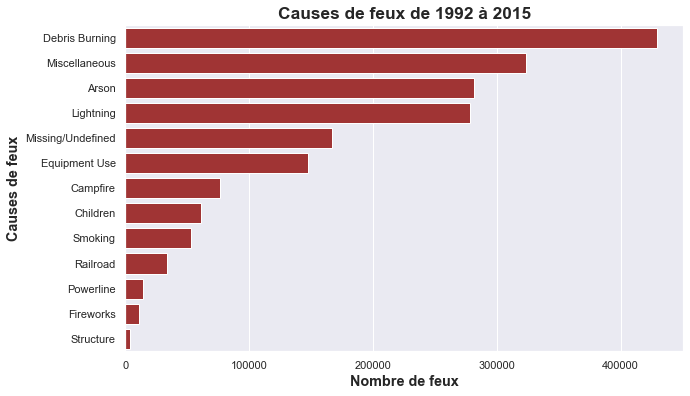

In [34]:
# Création d'un graphique en barre pour connaitre le nombre de causes de feux de 1992 à 2015
sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='STAT_CAUSE_DESCR', data = fires, order= fires['STAT_CAUSE_DESCR'].value_counts().index, color = 'firebrick')
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Causes de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Causes de feux de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()


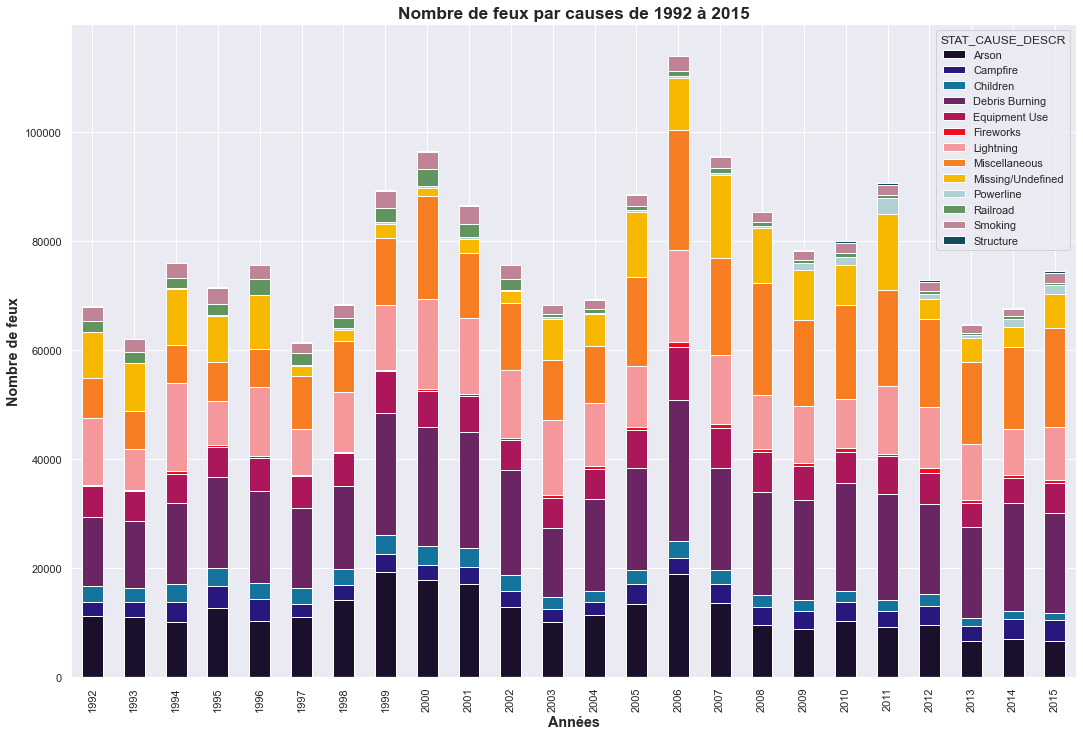

In [35]:
# Création d'un graphique montrant la répartition des causes de feux de 1992 à 2015
cross_cause = pd.crosstab(index = fires.FIRE_YEAR, columns = fires.STAT_CAUSE_DESCR).reset_index()

sns.set({"figure.figsize":(18, 12)})
cross_cause.plot.bar(x = 'FIRE_YEAR', 
    y = ['Arson', 'Campfire', 'Children',	'Debris Burning', 'Equipment Use', 'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined', 'Powerline', 'Railroad', 'Smoking', 'Structure'],
    stacked = True,
    color = ['#1B102B','#27187E','#15749D','#692662','#AC1759','#F10C1F','#F4989C','#F77E22', '#F7B801', '#B0D0D3', '#629460', '#C08497', '#0F4C5C'])
plt.xlabel('Années', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par causes de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Il y a 13 causes de feu répertoriées dans le dataset.

Voici le top 5 des causes de feu de forêt aux Etats-Unis entre 1992 et 2015 :
- Débris brûlant (22%)
- Divers (17.2%)
- Incendie criminel (15%)
- Eclair (14.8%)
- Données manquantes / non identifiées (8.9%)

Nous remarqons que la 2ème cause de feu appartient à la catégorie divers (on ne sait pas trop à quoi cela correspond) et la 5ème cause appartient à la catégorie données manquantes/non identifiées. Cela signifie qu'une grande partie de ces feux ne peut être expliquée.

##### Cause/Nb de feux vs Année

Nous pouvons regarder quelles ont été les années les plus marquées par les feux de forêt

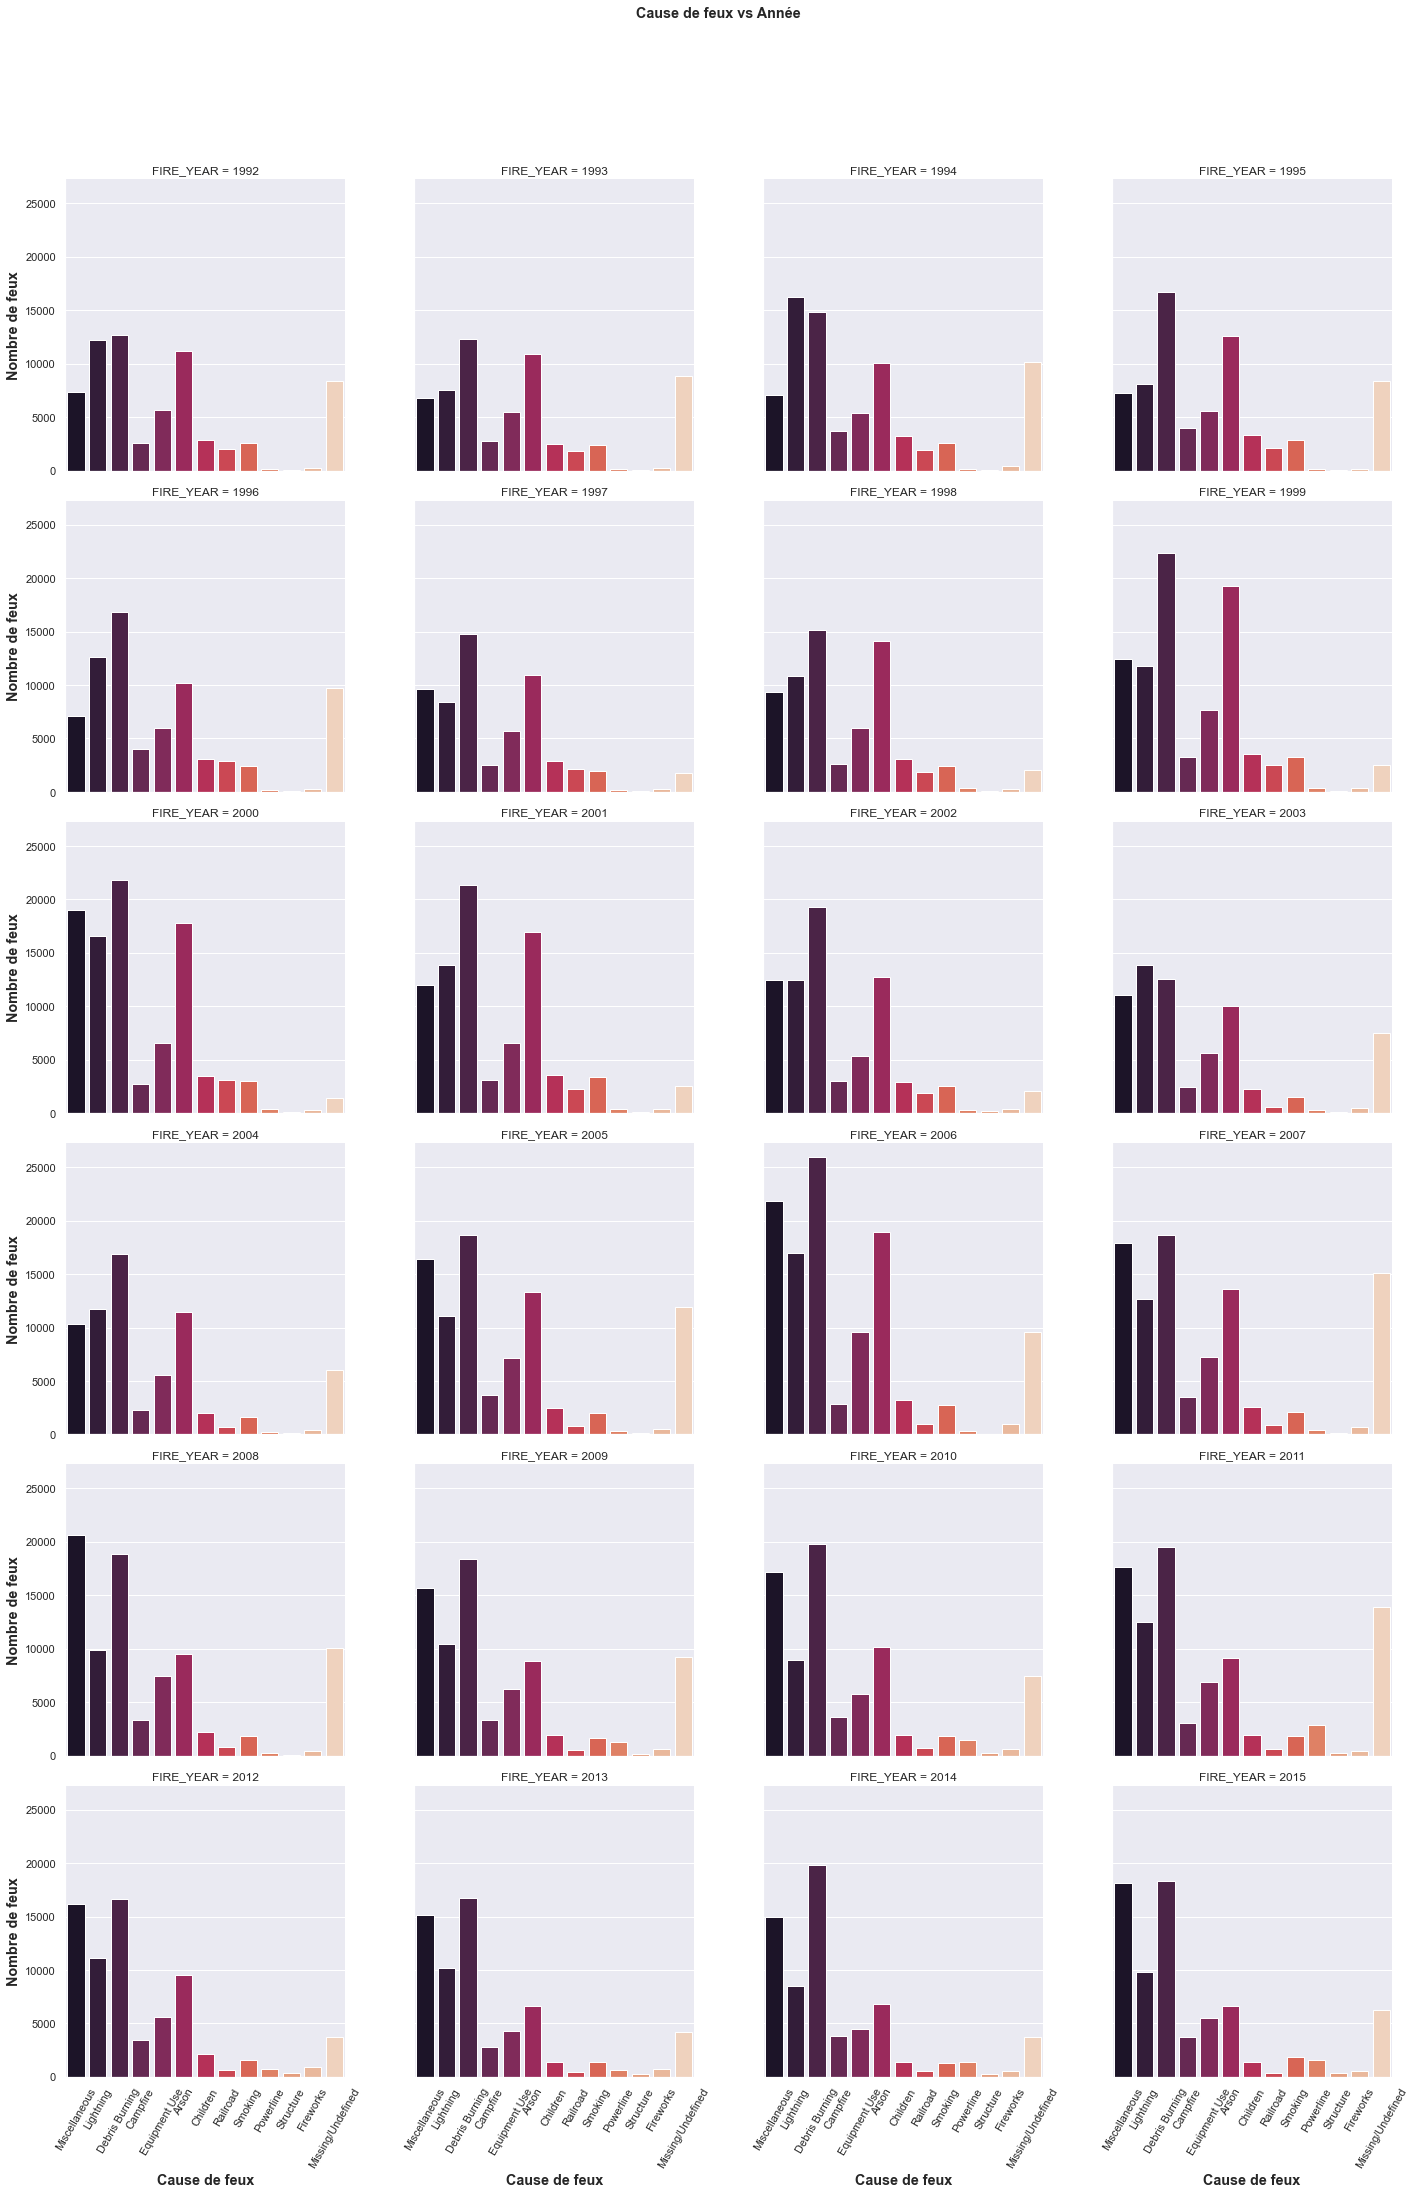

In [36]:
# Création de plusieurs graphiques pour connaitre la cause de feux par années et par causes de feux
g=sns.catplot(x='STAT_CAUSE_DESCR', col='FIRE_YEAR', kind='count',  palette = 'rocket', col_wrap=4, data = fires);
g.set_xticklabels(rotation=60); 

g.set_xlabels('Cause de feux', fontweight = 'bold', fontsize = 'large')
g.set_ylabels('Nombre de feux', fontweight = 'bold', fontsize = 'large')
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('Cause de feux vs Année', fontweight = 'bold', fontsize = 'large');

Nous constatons que la cause de feu la plus répandue est 'débris brûlant' avec des pics dépassant le nombre de 200 000 feux spécialement en 1999, 2000, 2001 et 2006. Les 2 autres causes principales sont la catégorie 'divers' et 'éclair'.

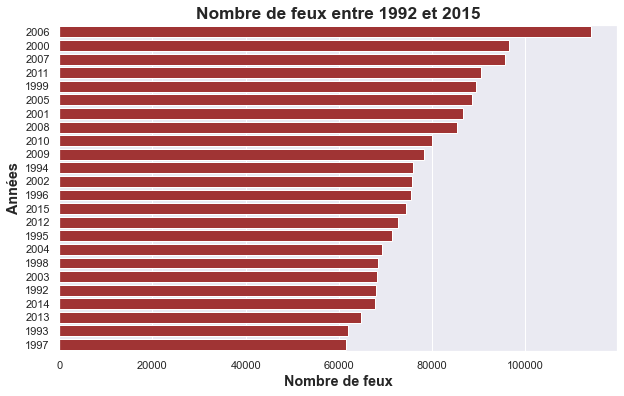

In [37]:
# Création d'un graphique en barre pour connaitre le nombre de feux par années entre 1992 et 2015
sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='FIRE_YEAR', data = fires, order= fires['FIRE_YEAR'].value_counts().index, color = 'firebrick')
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Années', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux entre 1992 et 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Avec ces graphiques, nous remarquons que l'année 2006 est nettement devant les autres années, suivie de l'année 2000 et 2007.  
Il est intéressant de comprendre pourquoi le nombre de feux est plus important durant l'année 2006.  

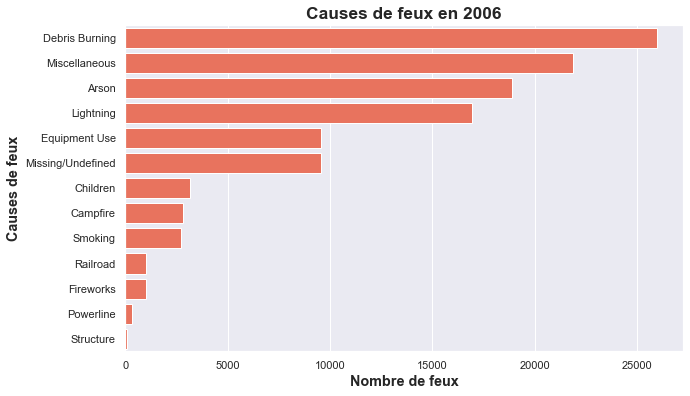

In [38]:
# Création d'un DataFrame uniquement pour l'année 2006
fires_analysis_2006 = fires[fires['FIRE_YEAR']==2006]
fires_analysis_2006['STAT_CAUSE_DESCR'].value_counts()

# Création d'un graphique en barre montrant les causes de feux en 2006
sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='STAT_CAUSE_DESCR', data = fires_analysis_2006, order= fires_analysis_2006['STAT_CAUSE_DESCR'].value_counts().index, color = 'tomato')
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Causes de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Causes de feux en 2006', fontsize = 'x-large', fontweight = 'bold')
plt.show()

On peut s'apercevoir que les causes les plus répandues en 2006 sont les débris brûlants, puis les causes diverses ainsi que les incendies criminels.  
C'est le même classement que pour l'ensemble du périmètre 1992 à 2015.  
On s'intéressera aux Etats et aux températures prochainement. A présent, nous allons regarder durant quels mois les feux de forêt de 2006 ont été 

### Cause/Nb de feux vs Mois

A quel moment de l'année les feux de forêt sont-ils les plus probables ?

In [39]:
# Création des colonnes mois et jour
# La colonne mois correspond aux mois où les feux ont été découvert
fires['MONTH'] = pd.DatetimeIndex(fires['DATE']).month_name()
# La colonne jour correspond aux jours de la semaine où les feux ont été découvert
fires['DAY'] = fires['DATE'].dt.day_name()


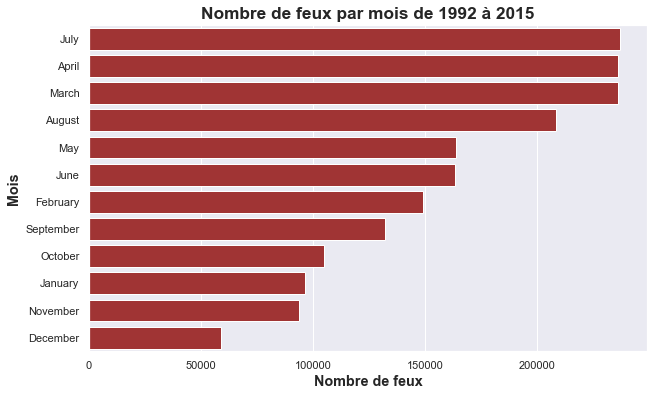

In [40]:
# Création d'un graphique en barre pour connaitre le nombre de de feux par mois de 1992 à 2015
sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='MONTH', data = fires, order= fires['MONTH'].value_counts().index, color = 'firebrick')
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Mois', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par mois de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

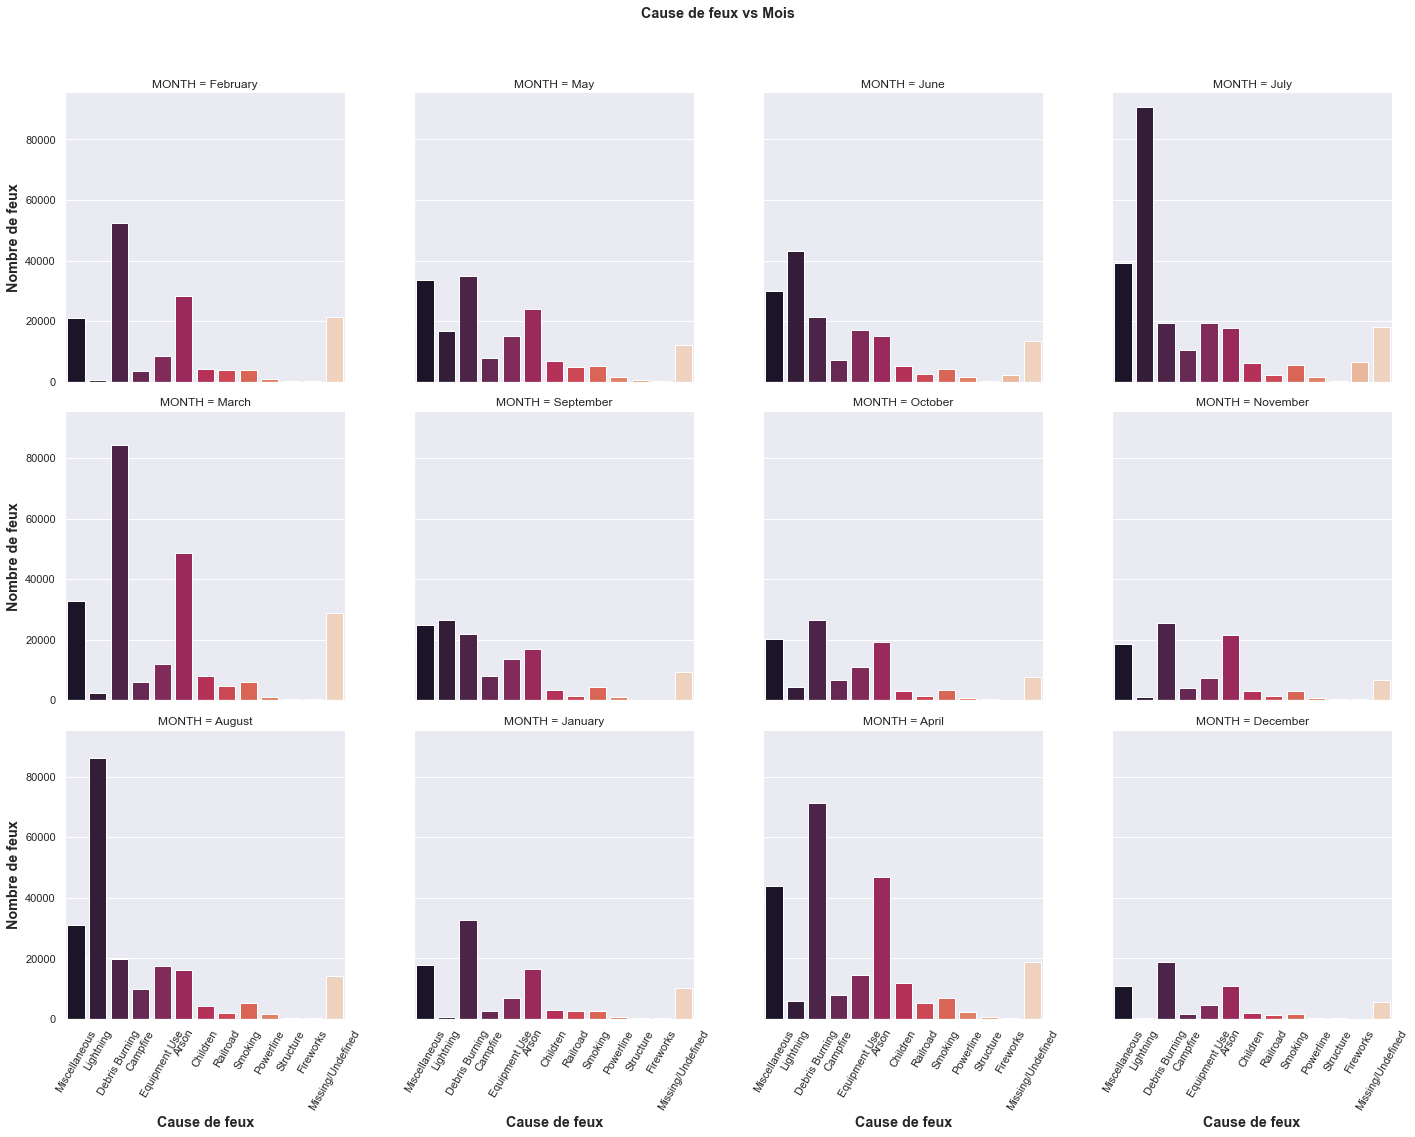

In [41]:
# Création de plusieurs graphiques pour connaitre la cause de feux par années et par causes de feux
g=sns.catplot(x='STAT_CAUSE_DESCR', col='MONTH', kind='count',  palette = 'rocket', col_wrap=4, data = fires);
g.set_xticklabels(rotation=60); 

g.set_xlabels('Cause de feux', fontweight = 'bold', fontsize = 'large')
g.set_ylabels('Nombre de feux', fontweight = 'bold', fontsize = 'large')
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('Cause de feux vs Mois', fontweight = 'bold', fontsize = 'large');

Les mois où les feux de forêt sont les plus présents sont les mois de juillet, avril et mars sur toute la période d'observation.  

Pour juillet la cause principale sont les éclairs qui sont très loin devant les feux d'artifices.    
En avril et en mars cela s'explique principalement par les débris brûlants.  
Il est intéressant de souligner qu'en aout les éclairs sont aussi la principale causes de feux de forêt.

Etant donné le nombre important de feux en juillet, nous pouvons nous interroger sur la date du 4 juillet qui correspond à la fête nationale des États-Unis commémorant la Déclaration d'indépendance.  
Nous pouvons imaginer que pendant cette journée, les individus utilise des feux d'artifice et causent des incendies.

#### Zoom sur le 4 juillet

In [42]:
# Etude sur les feux ayant été découverts le 04/07 de chaque année. Pour cela, prenons la variable 'DATE' qui correspond à la date de découverte des feux.
# Création de colonnes avec uniquement les mois et les jours
fires['SPLIT_MONTH'] = fires['DATE'].dt.month
fires['SPLIT_DAY'] = fires['DATE'].dt.day

# Création d'un DataFrame avec uniquement les données datant du 4 juillet de chaque année
fires_independance = fires[(fires['SPLIT_MONTH'] == 7) & (fires['SPLIT_DAY'] == 4)]
print('Il y a', len(fires_independance), 'observations dans le Dataset pour le 4 juillet de chaque année')

Il y a 14363 observations dans le Dataset pour le 4 juillet de chaque année


### Création de graphiques 

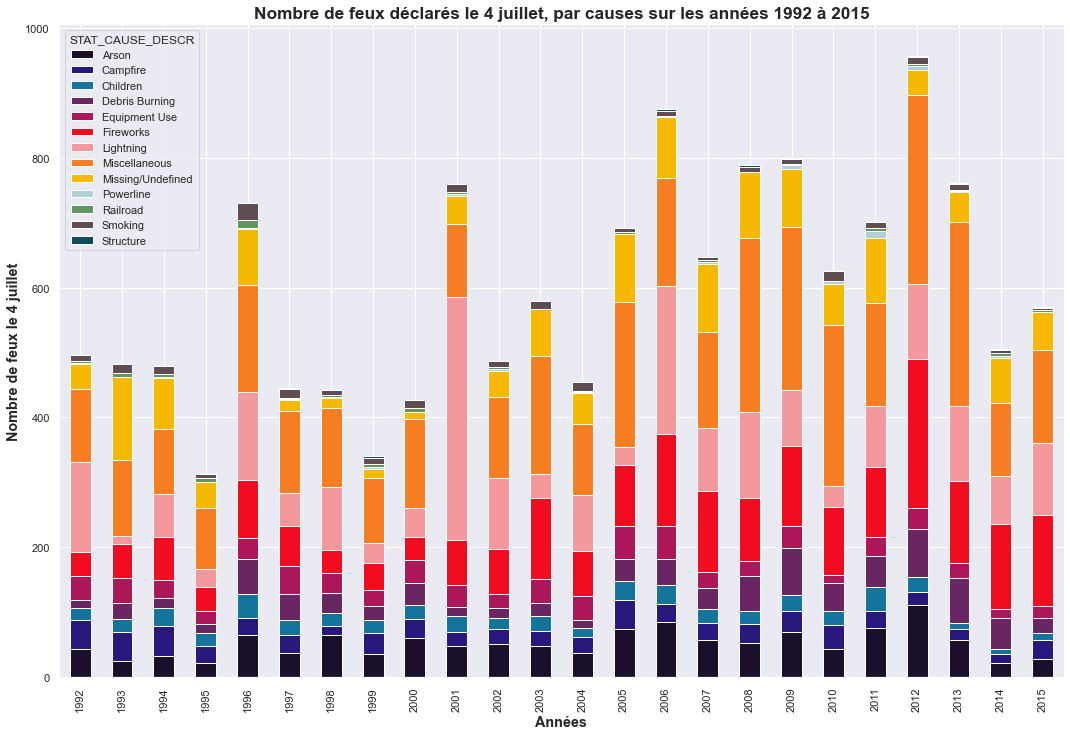

In [43]:
# Graphique montrant le nombre de feux le 4 juillet, par causes et par année
cross_cause_independance = pd.crosstab(index = fires_independance.FIRE_YEAR, columns = fires_independance.STAT_CAUSE_DESCR).reset_index()

sns.set({"figure.figsize":(18, 12)})
cross_cause_independance.plot.bar(x = 'FIRE_YEAR', 
    y = ['Arson', 'Campfire', 'Children',	'Debris Burning', 'Equipment Use', 'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined', 'Powerline', 'Railroad', 'Smoking', 'Structure'],
    stacked = True, 
    color = ['#1B102B','#27187E','#15749D','#692662','#AC1759','#F10C1F','#F4989C','#F77E22', '#F7B801', '#B0D0D3', '#629460', '#604D53', '#0F4C5C'])
plt.xlabel('Années', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Nombre de feux le 4 juillet', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux déclarés le 4 juillet, par causes sur les années 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Nous remarquons que le 4 juillet, les feux d'artifices ne sont pas la seule cause principale de feux. Les catégories 'éclairs' et 'divers' sont fortement présentes. En sachant que nous ne savons pas exactement à quoi correspond la catégorie divers. On peut supposer que dans cette catégorie sont recensées également des causes d'incendie par feux d'artifice.

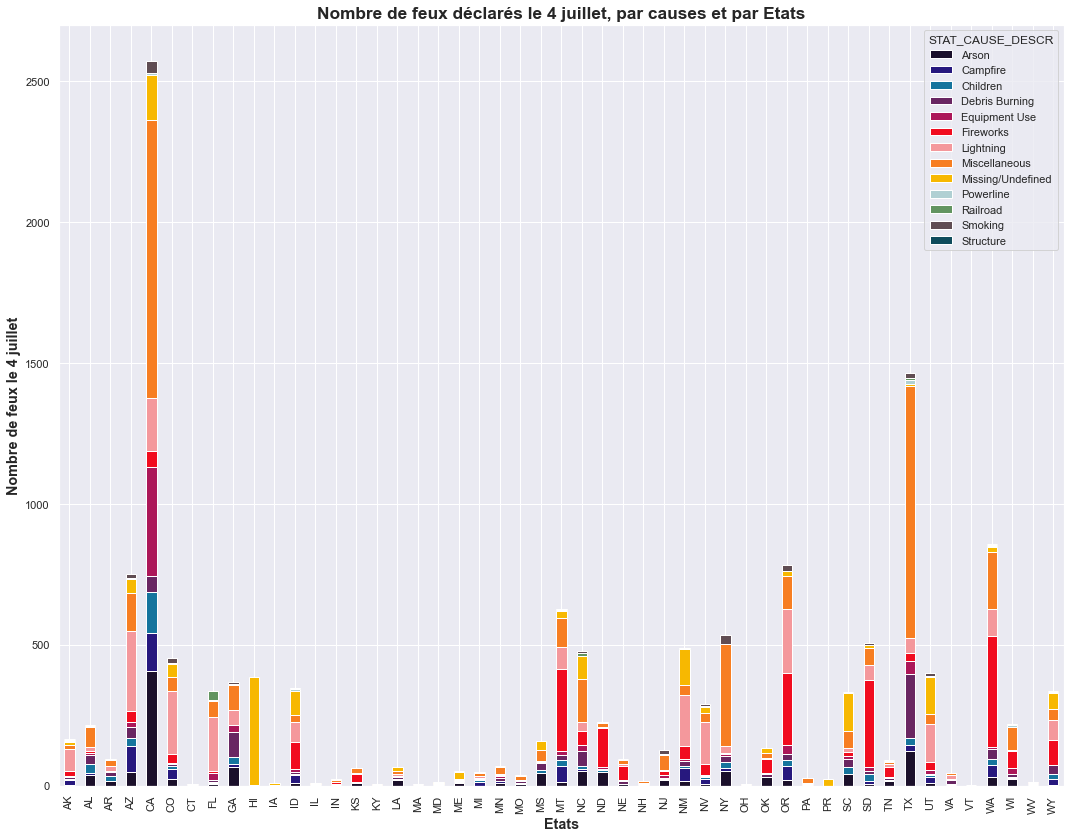

In [44]:
# Graphique montrant le nombre de feux le 4 juillet, par causes et par Etat
cross_cause_independance = pd.crosstab(index = fires_independance.STATE, columns = fires_independance.STAT_CAUSE_DESCR).reset_index()

sns.set({"figure.figsize":(18, 14)})
cross_cause_independance.plot.bar(x = 'STATE', 
    y = ['Arson', 'Campfire', 'Children',	'Debris Burning', 'Equipment Use', 'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined', 'Powerline', 'Railroad', 'Smoking', 'Structure'],
    stacked = True,
    color = ['#1B102B','#27187E','#15749D','#692662','#AC1759','#F10C1F','#F4989C','#F77E22', '#F7B801', '#B0D0D3', '#629460', '#604D53', '#0F4C5C'])
plt.xlabel('Etats', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Nombre de feux le 4 juillet', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux déclarés le 4 juillet, par causes et par Etats', fontsize = 'x-large', fontweight = 'bold')
plt.show()

D'après ce graphique, nous constatons que les feux d'artifice ne sont pas la principale cause de feux  dans tous les Etats-Unis, le 4 juillet de 1992 à 2015.  
Les Etats pour lesquels le feux d'artifice est la principale cause de feux de forêt sont Washington (WA), Dakota du Dud (SD), Montana (MT) et l'Oregon (OR).

Ce qui est intéressant dans ce graphique, c'est le nombre de feux en Californie le 4 juillet, qui dépasse largement les autres Etats. De plus, la principale cause de feux est la catégorie divers et les feux d'artifices ne représentent qu'un petit nombre des feux au total.

##### Cause/Nb de feux vs jour de la semaine

A quel moment de la semaine les feux de forêt sont-ils les plus probables ?

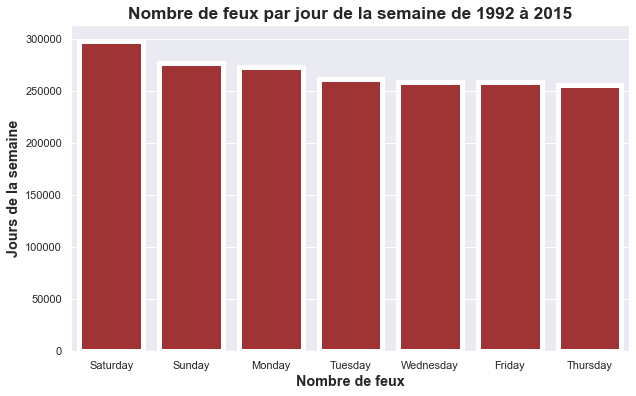

In [45]:
# Création d'un graphique en barre pour connaitre le nombre de de feux par jour de la semaine de 1992 à 2015
sns.set({"figure.figsize":(10, 6)})

sns.countplot(x='DAY', data = fires, order= fires['DAY'].value_counts().index, color = 'firebrick', linewidth = 5)
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Jours de la semaine', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par jour de la semaine de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Visiblement, les feux de forêt sont plus nombreux le samedi puis ensuite le dimanche et lundi. Le nombre de feux les autres jours ne sont pas significatifs.

On peut supposer que les feux de forêts sont déclenchés par des personnes négligentes : feux de camp, cigarettes, incendies malveillants.  

Il est peu probable que les incendies apparaissant le week-end proviennent de causes naturelles.

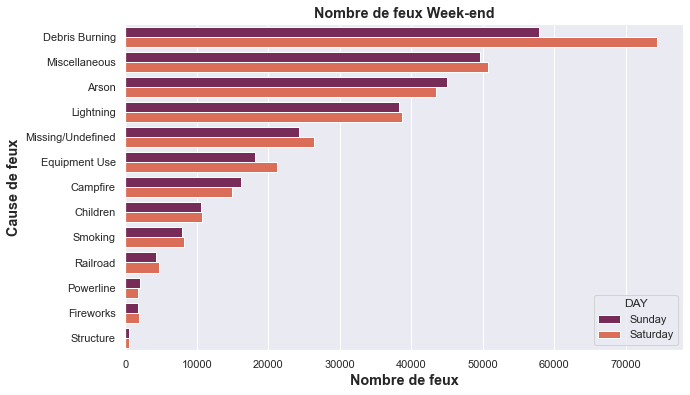

In [46]:
# Création d'un graphique en barre pour connaitre la cause de feux dans le week-end 
fires_weekend = fires[(fires['DAY']=='Saturday') | (fires['DAY']=='Sunday')]

sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='STAT_CAUSE_DESCR', data = fires_weekend, hue= 'DAY', palette='rocket', order= fires_weekend['STAT_CAUSE_DESCR'].value_counts().index);
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Cause de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux Week-end', fontweight = 'bold', fontsize = 'large');

Comme on imaginait, sur le week-end les feux de forêts sont déclenchés par des personnes négligentes. Notamment le Samedi, quand les gens sont plus susceptibles de sortir ce jour.

Par contre entre les jours de la semaine et le week-end, on ne voit pas une écart si significatif. Afin de le vérifier, on va checker la répartion de causes pour chaque jour.

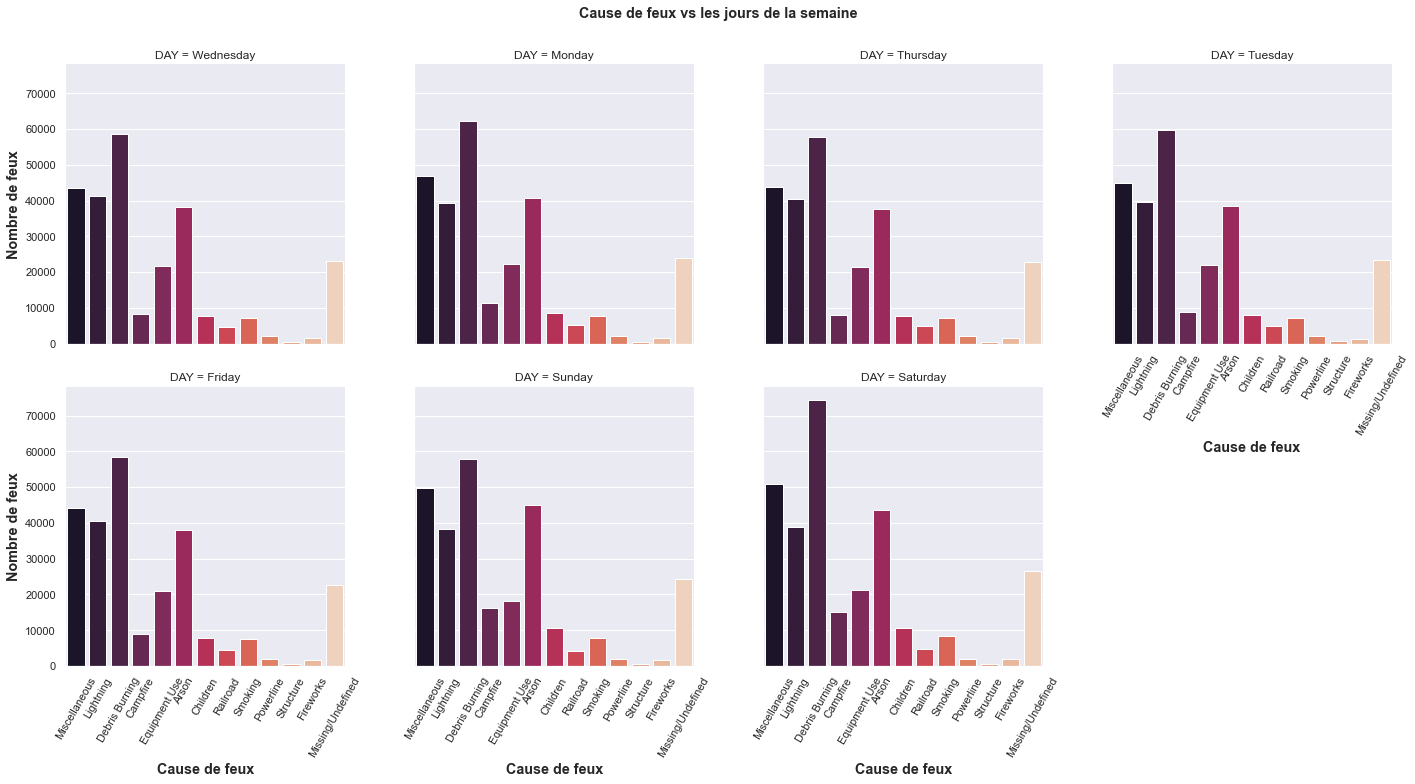

In [47]:
# Création de plusieurs graphiques pour connaitre la cause de feux vs les jours de la semaine
sns.set({"figure.figsize":(14, 12)})
g=sns.catplot(x='STAT_CAUSE_DESCR', col='DAY', kind='count',  palette = 'rocket', col_wrap=4, data = fires);
g.set_xticklabels(rotation=60); 

g.set_xlabels('Cause de feux', fontweight = 'bold', fontsize = 'large')
g.set_ylabels('Nombre de feux', fontweight = 'bold', fontsize = 'large')
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('Cause de feux vs les jours de la semaine', fontweight = 'bold', fontsize = 'large');


Même si sur le week-end on a plus d'incidence de feux (Debris Burning / Arson / Miscellaneous), les raisons des feux suivent la même tendance.

Ainsi, le week-end a un effet de croissance sur les causes d'incendies plus récurrents.

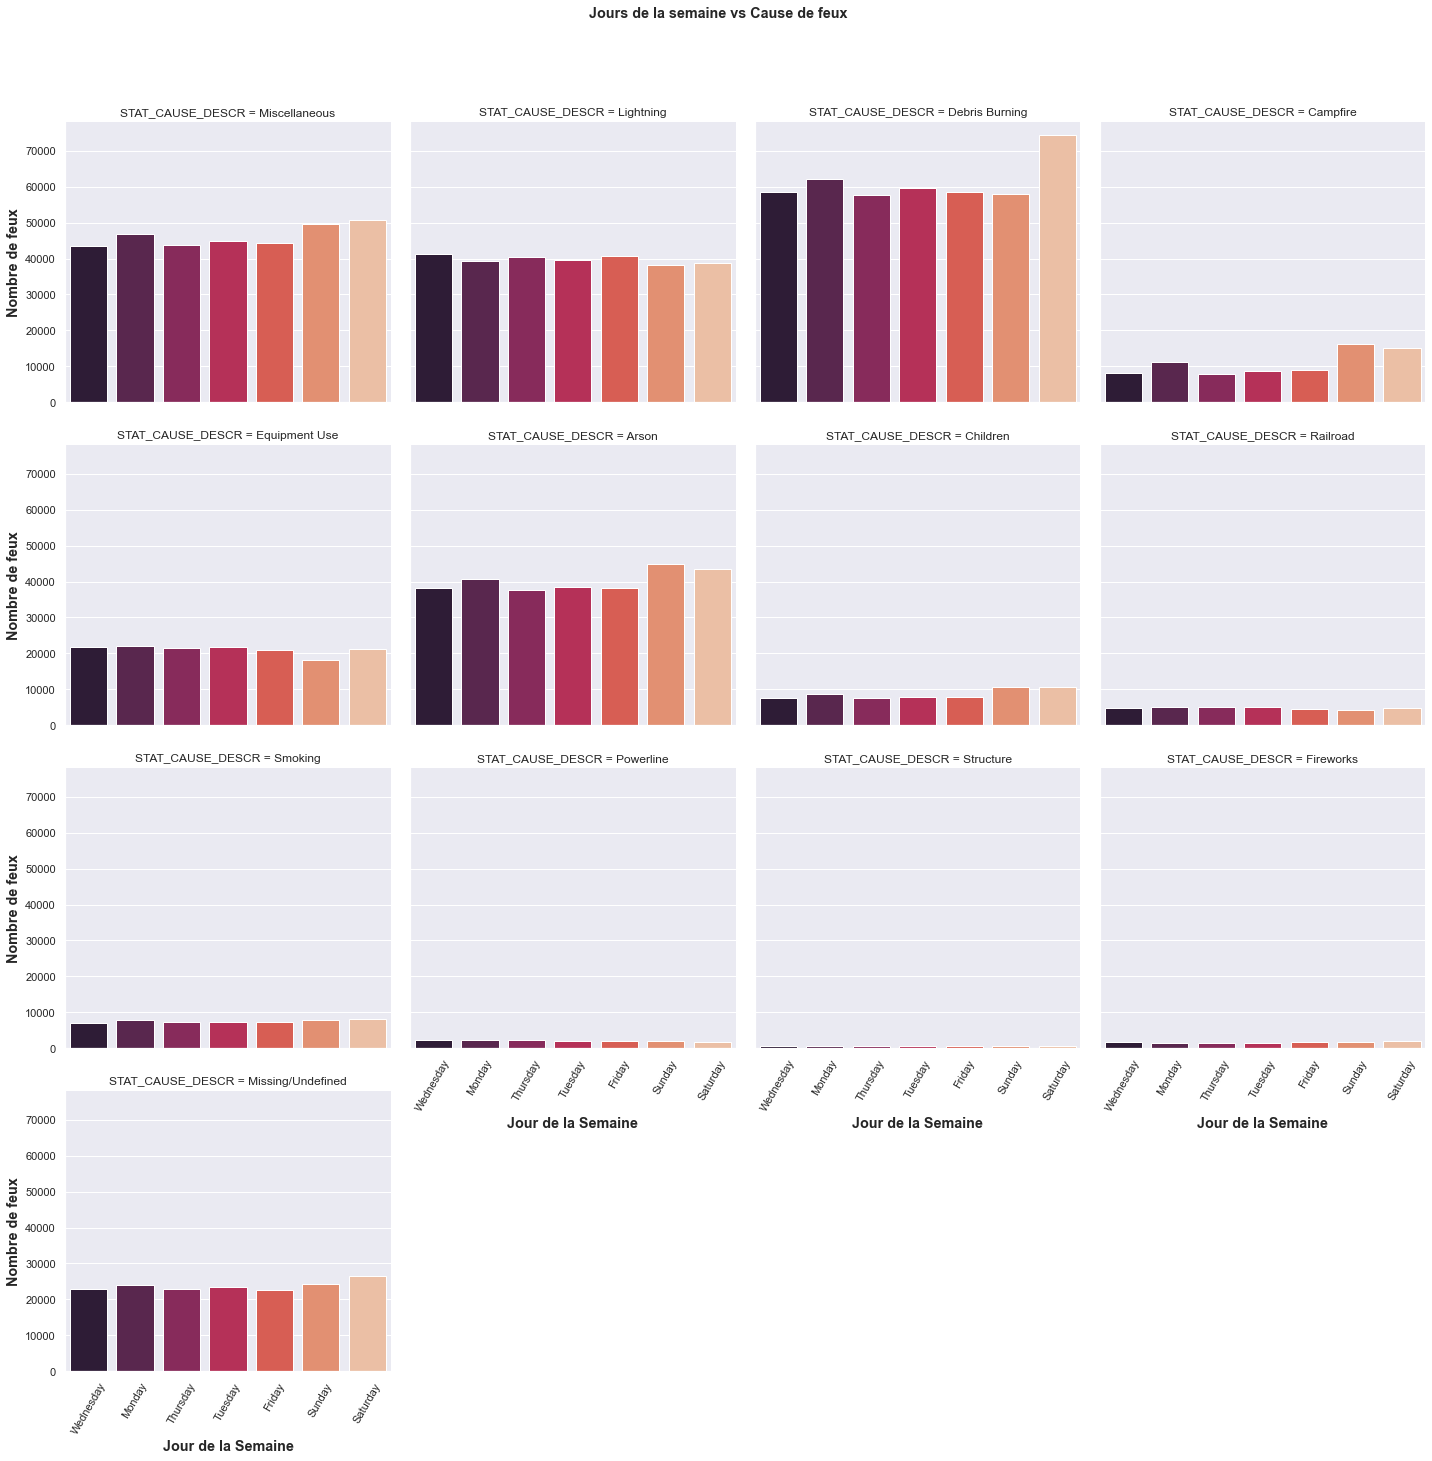

In [48]:
# Création de plusieurs graphiques pour voir les jours de la semaine vs la cause de feux

g=sns.catplot(x='DAY', col='STAT_CAUSE_DESCR', kind='count',  palette = 'rocket', col_wrap=4, data = fires);
g.set_xticklabels(rotation=60); 

g.set_xlabels('Jour de la Semaine', fontweight = 'bold', fontsize = 'large');
g.set_ylabels('Nombre de feux', fontweight = 'bold', fontsize = 'large');
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('Jours de la semaine vs Cause de feux', fontweight = 'bold', fontsize = 'large');

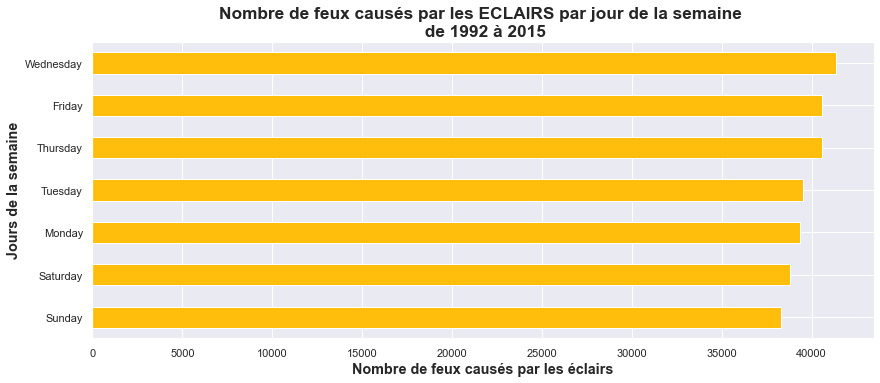

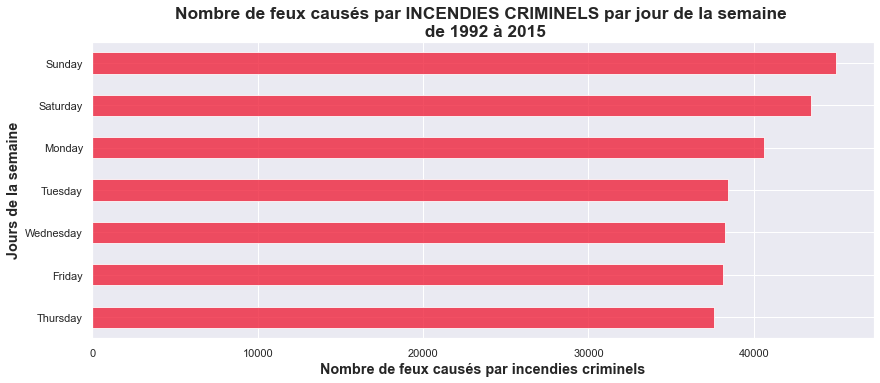

In [49]:
# Création d'un graphique en barre pour connaitre le nombre de de feux déclenchés par les éclairs par jour de la semaine de 1992 à 2015

plt.subplot(211)
fires_lightning = fires[fires['STAT_CAUSE_DESCR']=='Lightning']
fires_lightning['DAY'].value_counts().sort_values().plot(kind='barh',color='#FFBE0B')
plt.xlabel('Nombre de feux causés par les éclairs', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Jours de la semaine', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux causés par les ECLAIRS par jour de la semaine \n de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

# Création d'un graphique en barre pour connaitre le nombre de de feux déclenchés par incendies criminels par jour de la semaine de 1992 à 2015
plt.subplot(212)
fires_arson = fires[fires['STAT_CAUSE_DESCR']=='Arson']
fires_arson['DAY'].value_counts().sort_values().plot(kind='barh',color='#EF233C', alpha = 0.8)
plt.xlabel('Nombre de feux causés par incendies criminels', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Jours de la semaine', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux causés par INCENDIES CRIMINELS par jour de la semaine \n de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

ECLAIRS

Il y a de très légères variations, mais nous voyons que les feux causés par les éclairs se déclenchent moins le week-end.  
Nous pouvons examiner si l'augmentation des feux de forêt le week-end est due à des incendies malveillants.


INCENDIES CRIMINELS

Cela montre une tendance plus significative.  
Les incendies criminels sont plus probables le week-end que pendant la semaine, cela représente une augmentation d'environ 30 % de la moyenne des jours de la semaine. 

##### Relation états vs nombre d'incendies

Quels États ont le plus d'incendies ? (pour éviter un trop grand nombre de données, nous pouvons nous concentrer sur les dix premiers)

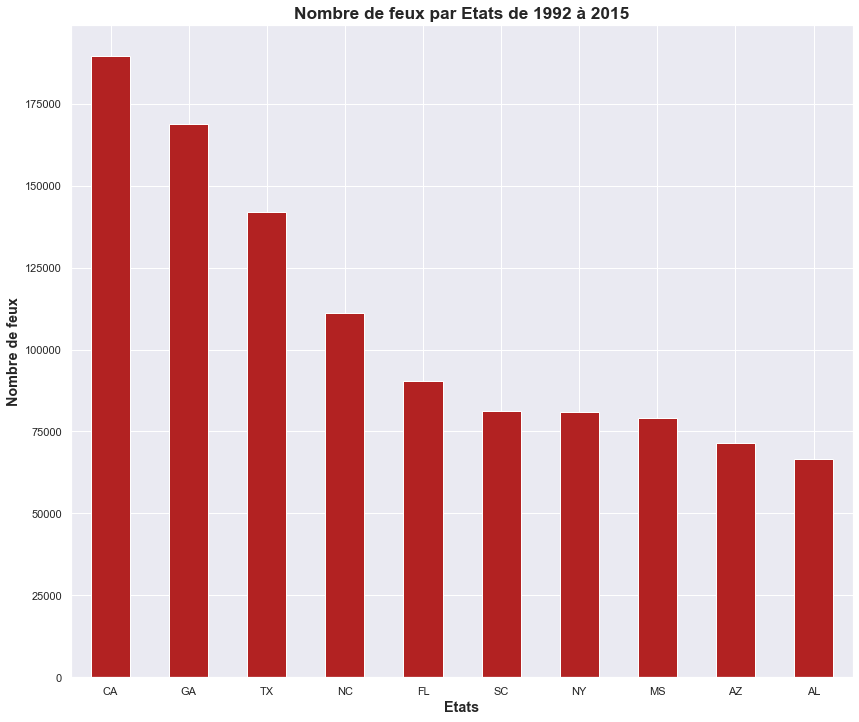

In [50]:
# Création d'un graphique en barre pour connaitre le nombre de de feux déclenchés par Etats de 1992 à 2015
fires['STATE'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar',color='firebrick')
plt.xlabel('Etats', fontweight = 'bold', fontsize = 'large')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par Etats de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()


Les 6 derniers Etats ont relativement le même ordre de grandeur de feux de forêt et la Caroline du Nord reste derrière les 3 premiers Etats.  
Nous pouvons nous concentrer sur les 3 premiers Etats qui sont la Californie, la Georgie et le Texas.

La Californie et le Texas sont de grands états avec des climats secs et subtropicaux. Le Texas a également des zones arides. En revanche, la Géorgie a un climant plutôt méditerranéen et continental. On peut se demander pourquoi cet Etat est en 2ème position.  
Nous pouvons enquêter sur les causes des incendies dans ces 3 états.

In [51]:
# Création des 3 DataFrames pour les 3 Etats
fires_CA = fires[fires['STATE']=='CA']
fires_GA = fires[fires['STATE']=='GA']
fires_TX = fires[fires['STATE']=='TX']

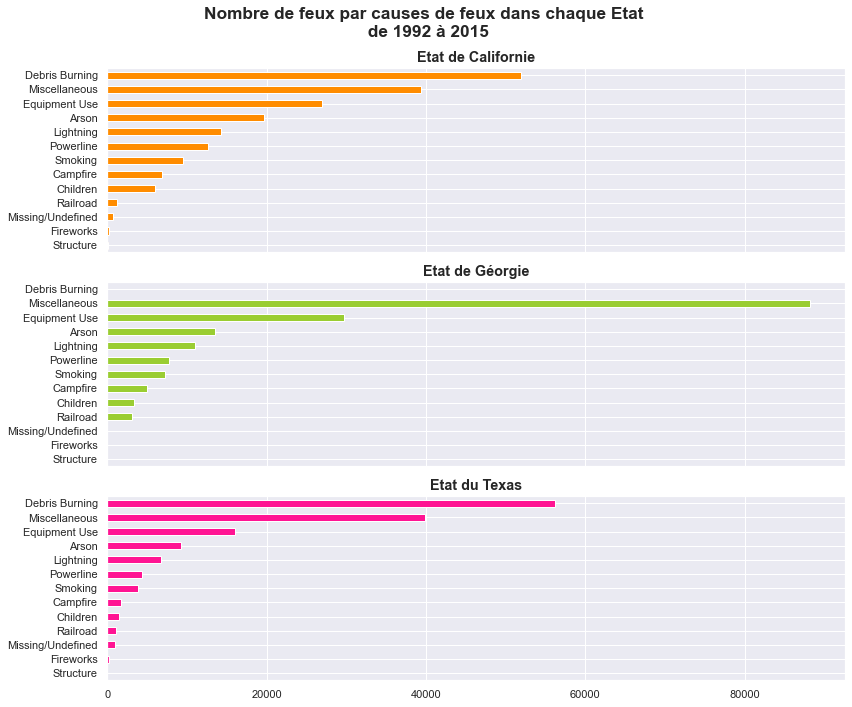

In [52]:
# Création des 3 sous-graphiques pour les 3 Etats
fig, ax = plt.subplots(3,1, figsize = (12, 10))
plt.suptitle('Nombre de feux par causes de feux dans chaque Etat \n de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')


ax1 = plt.subplot(311) 
fires_CA['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='darkorange',title='causes of fires for CA')
plt.title('Etat de Californie', fontsize = 'large', fontweight = 'bold')

ax2 = plt.subplot(312, sharex=ax1, sharey = ax1) 
fires_GA['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='yellowgreen',title='causes of fires for CA')
plt.title('Etat de Géorgie', fontsize = 'large', fontweight = 'bold')

ax3 = plt.subplot(313, sharex=ax1, sharey = ax1) 
fires_TX['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='deeppink',title='causes of fires for TX')
plt.title('Etat du Texas', fontsize = 'large', fontweight = 'bold')

fig.tight_layout()
plt.show()

Nous voyons que pour les Etats de Californie et du Texas l'ordre des causes est la même et le nombre de feux est sensiblement du même ordre de grandeur.  
Pour l'Etat de Géorgie c'est différent. La première cause d'incendie dépasse de près de 50% celle des 2 autres Etats et fait partie de la catégorie divers. Autrement dit, le nombre de feux n'est ni lié à des causes naturelles ni à des incendies criminels répertoriés dans le dataset.

In [53]:
# Création d'un DataFrame avec uniquement les 3 Etats
top_3_state = fires[(fires.STATE == 'CA') | (fires.STATE == 'GA') | (fires.STATE == 'TX')]

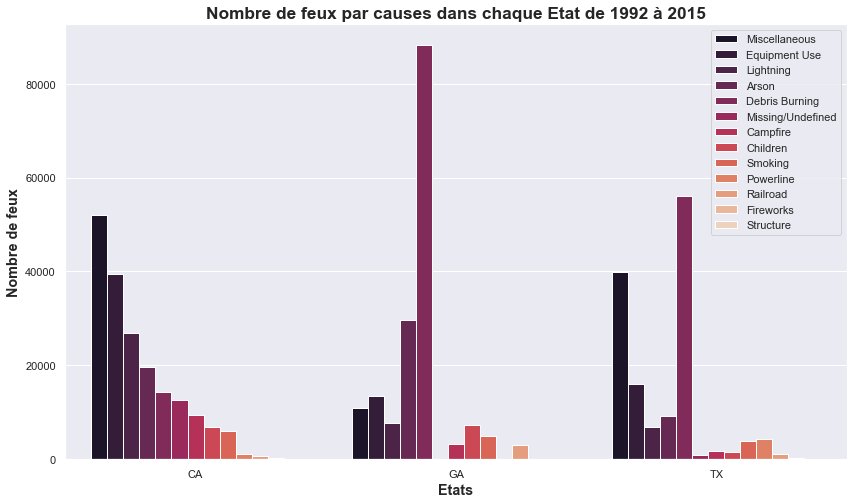

In [54]:
# Création d'un graphique en barre regroupant les 3 Etats dans un seul graphique
groupby_top_3 = top_3_state.groupby(['STATE'], as_index = False)['STAT_CAUSE_DESCR'].value_counts()
sns.set({"figure.figsize":(14, 8)})
sns.barplot(x = 'STATE', y = 'count', hue = 'STAT_CAUSE_DESCR', data = groupby_top_3, palette = 'rocket')
plt.xlabel('Etats', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par causes dans chaque Etat de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.legend(loc = 'best')
plt.show()

Ce graphique nous démontre que les 'débris brûlants' sont la principale cause de feux spécialement dans l'Etat de Géorgie et dans l'Etat du Texas. En revanche, en Californie c'est la cause 'Divers' qui est prédominante.  
Concernant les éclairs, ils se trouvent en 3ème position en Californie puis en 2ème position au Texas.

## Taille de feu

Une autre variable importante à prendre en compte et qui peut nous aider à interpréter les raisons de cause de feux de forêts c'est la classe de taille de feu, précédemment montré sur le camembert.

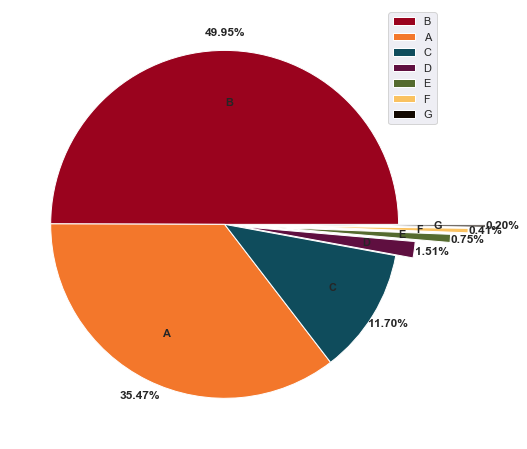

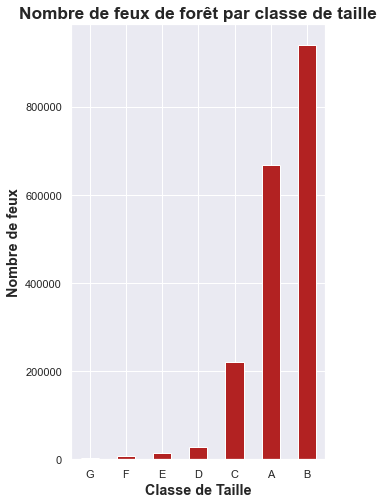

In [55]:
# Création d'un camembert pour analyser la répartition des classes de feux
df_fire_size_class = pd.DataFrame(fires['FIRE_SIZE_CLASS'].value_counts()).reset_index()
df_fire_size_class = df_fire_size_class.rename(columns = {'index' : 'FIRE_SIZE_CLASS', 'FIRE_SIZE_CLASS' : 'Nb'})

fig = plt.figure(figsize=(8,8))
plt.subplot(111)
plt.pie(x = df_fire_size_class.Nb, labels = df_fire_size_class.FIRE_SIZE_CLASS, 
colors = ['#9A031E', '#F3772B', '#0F4C5C', '#5F0F40', '#556B2F', '#FAC261', '#140A01'], 
labeldistance = 0.7, explode = (0,0,0,0.1, 0.3, 0.4, 0.5), autopct = '%.2f%%', pctdistance = 1.1, textprops = dict(weight = 'bold'))
plt.legend()
plt.show()

# Création d'un graphique en barre pour analyser la répartition des classes de feux
fig = plt.figure(figsize=(10,8))
plt.subplot(121)
fires['FIRE_SIZE_CLASS'].value_counts().sort_values(ascending = True).plot(kind='bar',color='firebrick')
plt.xlabel('Classe de Taille', fontweight = 'bold', fontsize = 'large')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux de forêt par classe de taille', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Nous pouvons voir que la classe B qui correspond à une taille de feu comprise entre 0,26 et 9,9 acres (soit entre 10,52 et 400,65 ares) est nettement supérieure aux autres classes, suivie de la plus petite classe (classe A) puis la classe C.

Pour rappel, ci-dessous les tailles de feux :  
A = > 0 et <= 0,25 acre = entre 0 et 10,12 ares  
B = 0,26 à 9,9 acres = entre 10,52 et 400,65 ares  
C = 10,0 à 99,9 acres = entre 405 et 4043 ares

In [56]:
# Comparaison de proportion par Etat et par classe de feux => reste proportion à faire
#tmp_gp = fires[['STATE','FIRE_SIZE_CLASS']]
#tmp_gp = tmp_gp.groupby('STATE',as_index=False)['FIRE_SIZE_CLASS'].value_counts()
#tmp_gp = tmp_gp.pivot(index='STATE',columns='FIRE_SIZE_CLASS')
#tmp_gp

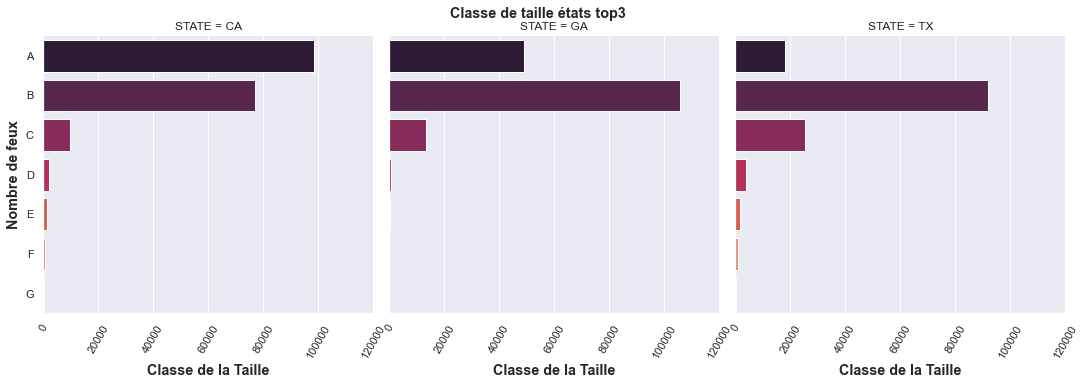

In [57]:
# Création d'un graphique pour vérifier le nombre d'occurrance vs classe de Taille sur les états top 3

groupby_size_state = top_3_state.groupby(['STATE', 'FIRE_SIZE_CLASS'], as_index = False)['STATE'].value_counts()

ax=sns.catplot(x='count', y='FIRE_SIZE_CLASS', col='STATE', kind='bar',  palette = 'rocket', col_wrap=3, data = groupby_size_state);
ax.set_xticklabels(rotation=60); 

ax.set_xlabels('Classe de la Taille', fontweight = 'bold', fontsize = 'large');
ax.set_ylabels('Nombre de feux', fontweight = 'bold', fontsize = 'large');
ax.fig.subplots_adjust(top=0.9);
ax.fig.suptitle('Classe de taille états top3', fontweight = 'bold', fontsize = 'large');

Ce qui est intéressant ici, c'est que la Californie, le top 1 en nombre d'incendies, a aussi le plus grand nombre de petits incendies, on peut donc supposer que l'action humaine est plus forte car 'Debris Burning, Miscellanious, Equipament Use et Arson' sont la principale cause des incendies.

A la Géorgie et au Texas, les feux se propagent dans une zone plus élevée (catégorie B), les raisons restent plutôt également par action humaine, par contre les feux dans ces états se propagent plus rapidement.

A titre d'information 1 acre = 4047 m2, soit 60% d'un terrain de football ou l'équivalent de 16 terrain de tennis.

Donc la grandeur d'un feu de catégorie B n'est pas négligeable.

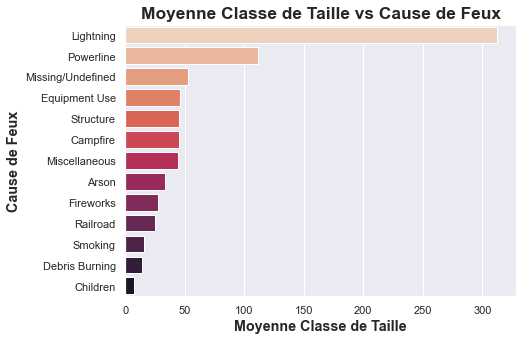

In [58]:
# Création d'un graphique pour vérifier la classe de taille moyenne par Cause 

groupby_size_cause = fires.groupby(['STAT_CAUSE_DESCR'], as_index = False)['FIRE_SIZE'].mean()

sns.set({"figure.figsize":(7, 5)})
sns.barplot(x = 'FIRE_SIZE', y = 'STAT_CAUSE_DESCR', data = groupby_size_cause.sort_values(by='FIRE_SIZE', ascending=False), palette = 'rocket_r')
plt.xlabel('Moyenne Classe de Taille', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Cause de Feux', fontweight = 'bold', fontsize = 'large')
plt.title('Moyenne Classe de Taille vs Cause de Feux', fontsize = 'x-large', fontweight = 'bold')
plt.show()

En moyenne, les feux qui se déclenchent électriquement (naturellement ou par action humaine) sont les plus dangereux et donc susceptibles de se propager.

# Statistiques descriptives

L'objectif c'est de comprendre les variables: Cause, Classe de Taille, Taille au travers d'indicateurs simples.
On va analyser les causes le plus recourrents: Arson, Debris Burning, Lightning, Miscellaneous.

### Analyse variables: Cause, Classe de Taille

In [59]:
fires_causes_top4 = fires[(fires['STAT_CAUSE_DESCR'] == 'Lightning') | (fires['STAT_CAUSE_DESCR'] == 'Debris Burning') | (fires['STAT_CAUSE_DESCR'] == 'Arson') | (fires['STAT_CAUSE_DESCR'] == 'Miscellaneous')]

In [60]:
groupby_size_stats = fires_causes_top4.groupby(['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']).agg({'FIRE_SIZE' : ['mean','median']})

groupby_size_stats['mean_med_diff'] = groupby_size_stats['FIRE_SIZE']['mean'] - groupby_size_stats['FIRE_SIZE']['median']

In [61]:
groupby_size_stats

FIRE_SIZE           mean_med_diff
                                          mean    median              
STAT_CAUSE_DESCR FIRE_SIZE_CLASS                                      
Arson            A                    0.129772      0.10      0.029772
                 B                    2.467428      2.00      0.467428
                 C                   29.478480     21.00      8.478480
                 D                  162.183735    150.00     12.183735
                 E                  499.161639    450.00     49.161639
                 F                 1966.018873   1621.00    345.018873
                 G                24418.420646  10446.00  13972.420646
Debris Burning   A                    0.126186      0.10      0.026186
                 B                    2.200320      1.33      0.870320
                 C                   26.722275     20.00      6.722275
                 D                  157.333985    150.00      7.333985
                 E                  491.270440    450.00     41.270440
                 F                 1914.621255   1538.95    375.671255
                 G                14400.371304   8284.00   6116.371304
Lightning        A                    0.112512      0.10      0.012512
                 B                    2.027580      1.00      1.027580
                 C                   31.874076     25.00      6.874076
                 D                  168.067111    155.00     13.067111
                 E                  535.019664    500.00     35.019664
                 F                 2262.685956   1988.00    274.685956
                 G                30991.156570  13202.00  17789.156570
Miscellaneous    A                    0.115749      0.10      0.015749
                 B                    1.940235      1.00      0.940235
                 C                   28.798415     20.00      8.798415
                 D                  158.983931    150.00      8.983931
                 E                  508.807041    461.60     47.207041
                 F                 2078.153733   1800.00    278.153733
                 G                21908.464998  10276.50  11631.964998

Rappel : 

Moyenne: Moyenne est la moyenne arithmétique d'une série de chiffres.

Medianne: Médiane est une valeur numérique qui sépare la moitié supérieurs de la moitié inférieure d'un ensemble.


En regardant la difference entre la moyenne et medianne ([mean_med_diff]) on s'apercoit que pour les classe de tailles le plus récurrents (A, B , C et D), la difference n'est pas très significative. C'est un bon indicateur car cela indique l'absence de valeurs extrêmes qui pourraient tirer vers le haut la moyenne. 
Donc en ce qui concerne les classes plus pertinents, les indicateurs nous renseigne sur l'homogénéité des variables dont nous disposons. 

Pour les classes E, F et G on a de moyennes très élévés car c'est logique, de même une considerable difference entre la moyenne et medianne ([mean_med_diff]), en indiquant la présence de valeurs extremes. En géneral, les feux de forêt sur grands superficies sont peu nombreux et cela a une influence directe sur la moyenne.

##### Statistiques - Variables Qualitatives et sa dépendance

On utilise la table de contingence pour croiser les différentes catégories des deux variables: Causes et Classe de Taille.
On va effectuer le test du  χ2  par table de contingence.

Pour ce test, on pose comme hypothèse nulle :
H0  : "les variables STAT_CAUSE_DESCR et FIRE_SIZE_CLASS sont indépendantes"

La fonction chi2_contingency de scipy appliquée à la table de contingence.
Elle renvoie un array de 4 éléments : la statistique du test, la p-value, le degré de liberté et la liste des fréquences attendues. Pour rejeter l'hypothèse nulle, il est nécessaire que la p-value soit inférieure à 5%.

In [62]:
table = pd.crosstab(fires['STAT_CAUSE_DESCR'],fires['FIRE_SIZE_CLASS'])
table

FIRE_SIZE_CLASS         A       B      C     D     E     F     G
STAT_CAUSE_DESCR                                                
Arson               61919  154181  55913  6239  2276   772   155
Campfire            44215   25911   5002   557   235   133    86
Children            26732   31489   2576   218   100    42    10
Debris Burning      95778  272347  54653  4263  1410   462   115
Equipment Use       53126   73377  16580  2493  1266   571   199
Fireworks            6054    4356    746   176   115    47     6
Lightning          152396   85802  24325  5773  4291  3462  2419
Miscellaneous      134441  152090  29189  4398  2146  1125   416
Missing/Undefined   52868   86781  21269  3012  1662   878   253
Powerline            4862    7022   1763   382   217   138    64
Railroad             9338   18921   4316   549   226    86    19
Smoking             23202   25535   3551   337   153    66    25
Structure            1988    1564    194    30    10     4     6

In [63]:
from scipy.stats import chi2_contingency 
 
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_value = resultats_test[1]
degre_liberte = resultats_test[2]

print('statistique:',statistique, 'p_value:', p_value, 'degre_liberte:', degre_liberte)

statistique: 175048.45582796063 p_value: 0.0 degre_liberte: 72


# Map visualisation -- Visualisation sur la carte


In [64]:
# Création d'un nouveau DataFrame en supprimant l'Alaska, Hawai et Puerto Rico du jeu de données car ces territoires ne se situent pas dans la carte des Etats_Unis.
fires_usa = fires.loc[(fires.loc[:,'STATE']!='AK') & (fires.loc[:,'STATE']!='HI') & (fires.loc[:,'STATE']!='PR')]
fires_usa_p = pd.DataFrame(fires_usa[['LATITUDE', 'LONGITUDE', 'FIRE_SIZE_CLASS', 'FIRE_SIZE', 'STATE']])

In [65]:
# On encode les classes de taille de feux pour pouvoir les utiliser dans le graphique suivant
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fires_usa_p['FIRE_SIZE_CLASS'] = le.fit_transform(fires_usa['FIRE_SIZE_CLASS'])

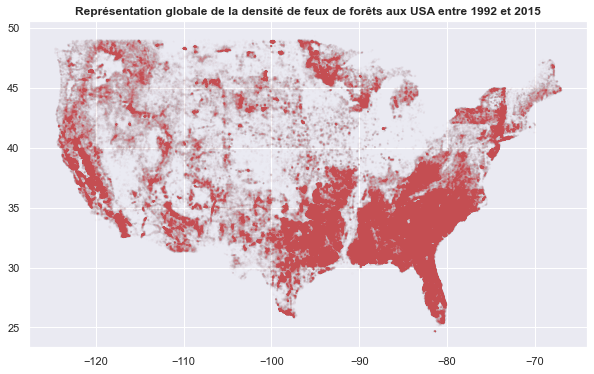

In [66]:
# Représentation graphique des feux de forêts aux USA (on utilise alpha pour distinguer les endroits où la densité des points est importante) :
plt.figure(figsize=(10,6))

plt.scatter(x='LONGITUDE',y='LATITUDE',data=fires_usa_p, alpha=0.01,s=fires_usa_p.FIRE_SIZE_CLASS,label="taille de feu",color='r')
plt.title('Représentation globale de la densité de feux de forêts aux USA entre 1992 et 2015', weight='bold')
plt.show()


A première vue, nous constatons qu'il y a plus de feux là où les états sont les plus peuplés.


Désormais nous allons créer deux cartes : une qui montre le nombre de feux de forêt pour chaque emplacement géographique et une qui montre la taille moyenne des feux de forêt pour chaque emplacement géographique.

In [67]:
# Création du DateFrame pour les 2 cartes
fires_map = pd.DataFrame(fires[['LATITUDE', 'LONGITUDE', 'FIRE_SIZE', 'STATE']])
fires_map

LATITUDE   LONGITUDE  FIRE_SIZE STATE
0        40.036944 -121.005833       0.10    CA
1        38.933056 -120.404444       0.25    CA
2        38.984167 -120.735556       0.10    CA
3        38.559167 -119.913333       0.10    CA
4        38.559167 -119.933056       0.10    CA
...            ...         ...        ...   ...
1880460  40.481637 -122.389375       0.01    CA
1880461  37.617619 -120.938570       0.20    CA
1880462  37.617619 -120.938570       0.10    CA
1880463  37.672235 -120.898356       2.00    CA
1880464  34.263217 -116.830950       0.10    CA

[1880465 rows x 4 columns]

Ensuite, nous supprimons l'Alaska, Hawai et Puerto Rico du jeu de données car ces territoires ne se situent pas dans la carte des Etats_Unis.

In [68]:
fires_map_usa = fires_map.loc[(fires_map.loc[:,'STATE']!='AK') & (fires_map.loc[:,'STATE']!='HI') & (fires_map.loc[:,'STATE']!='PR')]

In [69]:
# Suppression des messages d'avertissement de Pandas qui ne sont pas pertinents
pd.options.mode.chained_assignment = None

Pour une carte cohérente, nous allons regrouper les feux de forêt qui se sont produits à proximité les uns des autres.  
Pour ce faire, nous allons tronquer toutes les valeurs de latitude et de longitude, puis combiner les valeurs dans une nouvelle variable (LAT_LONG).

In [70]:
fires_map_usa.loc[:,'LATITUDE'] = ((fires_map_usa.loc[:,'LATITUDE']*10).apply(np.floor))/10
fires_map_usa.loc[:,'LONGITUDE'] = ((fires_map_usa.loc[:,'LONGITUDE']*10).apply(np.floor))/10
fires_map_usa.loc[:,'LAT_LONG'] = fires_map_usa.loc[:,'LATITUDE'].map(str) + '-' + fires_map_usa.loc[:,'LONGITUDE'].map(str)
group = fires_map_usa.groupby(['LAT_LONG', 'LATITUDE', 'LONGITUDE'])

In [71]:
# Création de la datasource pour la première carte concernant le nombre de feux de forêt par emplacement géographique
nb_fires_map = group['FIRE_SIZE'].agg(['count']).reset_index()
fires_map_usa.head()

LATITUDE  LONGITUDE  FIRE_SIZE STATE     LAT_LONG
0      40.0     -121.1       0.10    CA  40.0--121.1
1      38.9     -120.5       0.25    CA  38.9--120.5
2      38.9     -120.8       0.10    CA  38.9--120.8
3      38.5     -120.0       0.10    CA  38.5--120.0
4      38.5     -120.0       0.10    CA  38.5--120.0

In [72]:
# Création de la datasource pour la seconde carte concernant la taille moyenne des feux de forêt par emplacement géographique
size_fires_map = group['FIRE_SIZE'].agg(['mean']).reset_index()
size_fires_map.head()

LAT_LONG  LATITUDE  LONGITUDE      mean
0  24.5--81.7      24.5      -81.7  0.500000
1  24.6--81.3      24.6      -81.3  0.100000
2  24.6--81.4      24.6      -81.4  0.501630
3  24.6--81.5      24.6      -81.5  0.646512
4  24.6--81.6      24.6      -81.6  0.954545

In [73]:
# Création de la première carte
source = ColumnDataSource(nb_fires_map)
p1 = figure(title='Nombre de feux de forêt de 1992 à 2015 (plus les couleurs sont claires, plus il y a de feux)', toolbar_location=None, plot_width=700, plot_height=500)
p1.background_fill_color = 'black'
p1.grid.grid_line_color = None
p1.axis.visible = False
color_mapper = LogColorMapper(palette=cc.fire)
glyph = p1.circle('LONGITUDE', 'LATITUDE', source=source, color={'field': 'count', 'transform' : color_mapper}, size=1)
output_notebook()
show(p1)

Loading BokehJS ...

In [74]:
# Création de la seconde carte
source = ColumnDataSource(size_fires_map)
p2 = figure(title='Taille moyenne des feux de forêt survenus de 1992 à 2015 (plus les couleurs sont claires, plus le feux est grand)', toolbar_location=None, plot_width=700, plot_height=500)
p2.background_fill_color = 'black'
p2.grid.grid_line_color = None
p2.axis.visible = False
glyph = p2.circle('LONGITUDE', 'LATITUDE', source=source, color={'field': 'mean', 'transform' : color_mapper}, size=1)
show(p2)

D'après ces 2 cartes, nous voyons qu'il y a plus de feux de forêt dans les zones où il y a beaucoup plus de population. Donc on peut garder l'hypothèse qu'il y a plus de feux engendrés par des personnes que par des causes naturelles.  
De plus, ces feux de forêt sont plus petits, probablement parce qu'ils sont plus rapidement maîtrisées du fait de la proximité des pompiers.

Désormais, nous pouvons nous intéresser aux différentes tailles de feux sur les années de 1992 à 2015.  
Par exemple, nous pouvons prendre les plus petites et les plus grosses tailles de feux afin de les comparer sur la carte des USA. Puis nous pouvons également nous intéresser aux tailles de feux les plus répandues, celles qui appartiennent à la classe B.

En regardant les plus petites tailles de feux ainsi que les tailles de feux les plus répandues, il s'avère que le schéma est répétitif d'une année sur l'autre : le nombre de feux selon les états restent sensiblement identique sur toute la période. Le graphique montre des tâches rouges indiscernables les unes sur les autres. Il n'y a pas d'intérêt à montrer ces graphiques.

### Classes de feux les plus grandes (classe G)

Cf. Notebook nommé Graph_classe_G

Intéressons-nous aux feux de forêts durant l'année la plus récente du dataset, c'est à dire l'année 2015.  
Pour un visuel plus attractif, nous pouvons afficher une carte animée qui met en évidence l'évolution des feux : cf. Notebook nommé Animated_map.  

Dans ce notebook, nous verrons également l'évolution des feux lors du 4 juillet de chaque année.

In [75]:
fires_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835646 entries, 0 to 1880464
Data columns (total 48 columns):
 #   Column                      Dtype          
---  ------                      -----          
 0   OBJECTID                    int64          
 1   FOD_ID                      int64          
 2   FPA_ID                      object         
 3   SOURCE_SYSTEM_TYPE          object         
 4   SOURCE_SYSTEM               object         
 5   NWCG_REPORTING_AGENCY       object         
 6   NWCG_REPORTING_UNIT_ID      object         
 7   NWCG_REPORTING_UNIT_NAME    object         
 8   SOURCE_REPORTING_UNIT       object         
 9   SOURCE_REPORTING_UNIT_NAME  object         
 10  LOCAL_FIRE_REPORT_ID        object         
 11  LOCAL_INCIDENT_ID           object         
 12  FIRE_CODE                   object         
 13  FIRE_NAME                   object         
 14  ICS_209_INCIDENT_NUMBER     object         
 15  ICS_209_NAME                object         
 16  

# WEATHER

In [76]:
# Création du dataframe avec les éléments météorologiques
fires_weather = fires_usa[['STAT_CAUSE_DESCR','FIRE_SIZE_CLASS', 'STATE', 'DAY', 'FIRE_YEAR', 'DISCOVERY_DAY', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE', 'SPLIT_MONTH', 'SPLIT_DAY']]

# ajout de 2 colonnes concat_year_month et code_etat_year pour pouvoir insérer les températures et précipitation de l'état par année
fires_weather['FIRE_YEAR'] = fires_weather['FIRE_YEAR'].astype('str')
fires_weather['SPLIT_MONTH'] = fires_weather['SPLIT_MONTH'].astype('str')
fires_weather['concat_state_year_month'] = fires_weather['STATE'] + '-' + fires_weather['FIRE_YEAR'] + '-' + fires_weather['SPLIT_MONTH']

fires_weather['FIRE_YEAR'] = fires_weather['FIRE_YEAR'].astype('int')
fires_weather['SPLIT_MONTH'] = fires_weather['SPLIT_MONTH'].astype('int')

fires_weather


STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE        DAY  FIRE_YEAR  \
0            Miscellaneous               A    CA  Wednesday       2005   
1                Lightning               A    CA  Wednesday       2004   
2           Debris Burning               A    CA     Monday       2004   
3                Lightning               A    CA     Monday       2004   
4                Lightning               A    CA     Monday       2004   
...                    ...             ...   ...        ...        ...   
1880460  Missing/Undefined               A    CA   Saturday       2015   
1880461      Miscellaneous               A    CA     Monday       2015   
1880462  Missing/Undefined               A    CA   Saturday       2015   
1880463  Missing/Undefined               B    CA  Wednesday       2015   
1880464      Miscellaneous               A    CA   Saturday       2015   

         DISCOVERY_DAY   LATITUDE   LONGITUDE  FIRE_SIZE  SPLIT_MONTH  \
0                   33  40.036944 -121.005833       0.10            2   
1                  133  38.933056 -120.404444       0.25            5   
2                  152  38.984167 -120.735556       0.10            5   
3                  180  38.559167 -119.913333       0.10            6   
4                  180  38.559167 -119.933056       0.10            6   
...                ...        ...         ...        ...          ...   
1880460            269  40.481637 -122.389375       0.01            9   
1880461            278  37.617619 -120.938570       0.20           10   
1880462            122  37.617619 -120.938570       0.10            5   
1880463            287  37.672235 -120.898356       2.00           10   
1880464             73  34.263217 -116.830950       0.10            3   

         SPLIT_DAY concat_state_year_month  
0                2               CA-2005-2  
1               12               CA-2004-5  
2               31               CA-2004-5  
3               28               CA-2004-6  
4               28               CA-2004-6  
...            ...                     ...  
1880460         26               CA-2015-9  
1880461          5              CA-2015-10  
1880462          2               CA-2015-5  
1880463         14              CA-2015-10  
1880464         14               CA-2015-3  

[1835646 rows x 12 columns]

In [77]:
# Chargement du fichier avec les données météorologiques
meteo = pd.read_csv('weather_month.csv',sep=',')
meteo = meteo.drop('Unnamed: 0',axis=1)
meteo


state_code_year  month  WET_DRY_SPELL  PRECIPITATION  TEMPERATURE  \
0             AK-1992      1         -99.99           3.59          6.5   
1             AK-1992      2         -99.99           2.69          0.3   
2             AK-1992      3         -99.99           3.14         12.8   
3             AK-1992      4         -99.99           1.43         22.6   
4             AK-1992      5         -99.99           2.27         33.9   
...               ...    ...            ...            ...          ...   
14107         WY-2015      8           0.04           0.91         64.3   
14108         WY-2015      9          -0.69           0.64         59.4   
14109         WY-2015     10          -1.03           1.11         48.7   
14110         WY-2015     11          -0.92           1.09         29.2   
14111         WY-2015     12          -0.80           1.11         21.4   

                             CLIMAT STATE_YEAR_MONTH  
0      continental humide ete frais        AK-1992-1  
1      continental humide ete frais        AK-1992-2  
2      continental humide ete frais        AK-1992-3  
3      continental humide ete frais        AK-1992-4  
4      continental humide ete frais        AK-1992-5  
...                             ...              ...  
14107                        steppe        WY-2015-8  
14108                        steppe        WY-2015-9  
14109                        steppe       WY-2015-10  
14110                        steppe       WY-2015-11  
14111                        steppe       WY-2015-12  

[14112 rows x 7 columns]

In [78]:
# Intégration du climat, température moyenne, précipitation moyenne, et indice de sécheresse et humidité moyens
fires_weather.insert(8,'CLIMAT',fires_weather['concat_state_year_month'].map(meteo.set_index('STATE_YEAR_MONTH')['CLIMAT']))
fires_weather.insert(8,'TEMPERATURE',fires_weather['concat_state_year_month'].map(meteo.set_index('STATE_YEAR_MONTH')['TEMPERATURE']))
fires_weather.insert(9,'PRECIPITATION',fires_weather['concat_state_year_month'].map(meteo.set_index('STATE_YEAR_MONTH')['PRECIPITATION']))
fires_weather.insert(10,'WET_DRY_SPELL',fires_weather['concat_state_year_month'].map(meteo.set_index('STATE_YEAR_MONTH')['WET_DRY_SPELL']))

fires_weather

STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE        DAY  FIRE_YEAR  \
0            Miscellaneous               A    CA  Wednesday       2005   
1                Lightning               A    CA  Wednesday       2004   
2           Debris Burning               A    CA     Monday       2004   
3                Lightning               A    CA     Monday       2004   
4                Lightning               A    CA     Monday       2004   
...                    ...             ...   ...        ...        ...   
1880460  Missing/Undefined               A    CA   Saturday       2015   
1880461      Miscellaneous               A    CA     Monday       2015   
1880462  Missing/Undefined               A    CA   Saturday       2015   
1880463  Missing/Undefined               B    CA  Wednesday       2015   
1880464      Miscellaneous               A    CA   Saturday       2015   

         DISCOVERY_DAY   LATITUDE   LONGITUDE  TEMPERATURE  PRECIPITATION  \
0                   33  40.036944 -121.005833         47.1           4.03   
1                  133  38.933056 -120.404444         63.2           0.45   
2                  152  38.984167 -120.735556         63.2           0.45   
3                  180  38.559167 -119.913333         70.4           0.08   
4                  180  38.559167 -119.933056         70.4           0.08   
...                ...        ...         ...          ...            ...   
1880460            269  40.481637 -122.389375         72.1           0.33   
1880461            278  37.617619 -120.938570         65.0           0.90   
1880462            122  37.617619 -120.938570         60.8           0.93   
1880463            287  37.672235 -120.898356         65.0           0.90   
1880464             73  34.263217 -116.830950         56.9           0.78   

         WET_DRY_SPELL        CLIMAT  FIRE_SIZE  SPLIT_MONTH  SPLIT_DAY  \
0                 2.28  mediteraneen       0.10            2          2   
1                -2.15  mediteraneen       0.25            5         12   
2                -2.15  mediteraneen       0.10            5         31   
3                -2.80  mediteraneen       0.10            6         28   
4                -2.80  mediteraneen       0.10            6         28   
...                ...           ...        ...          ...        ...   
1880460          -4.48  mediteraneen       0.01            9         26   
1880461          -4.48  mediteraneen       0.20           10          5   
1880462          -5.11  mediteraneen       0.10            5          2   
1880463          -4.48  mediteraneen       2.00           10         14   
1880464          -5.67  mediteraneen       0.10            3         14   

        concat_state_year_month  
0                     CA-2005-2  
1                     CA-2004-5  
2                     CA-2004-5  
3                     CA-2004-6  
4                     CA-2004-6  
...                         ...  
1880460               CA-2015-9  
1880461              CA-2015-10  
1880462               CA-2015-5  
1880463              CA-2015-10  
1880464               CA-2015-3  

[1835646 rows x 16 columns]

In [79]:
# Regroupement de la variable catégorielle STAT_CAUSE_DESCR par type de cause 
def change_cause(cat):
    cause = 0
    natural_cause = ['Lightning']
    accidental_cause = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    criminal_cause = ['Arson']
    other_cause = ['Missing/Undefined','Miscellaneous']
    if cat in natural_cause:
        cause = 'naturelle'
    elif cat in accidental_cause:
        cause = 'accidentelle'
    elif cat in criminal_cause:
        cause = 'criminelle'
    else:
        cause = 'autre_cause'
    return cause
     
fires_weather['CAUSE'] = fires_weather['STAT_CAUSE_DESCR'].apply(lambda x: change_cause(x))


# Conversion des acres en km² => 1 acre = 40.47 ares = 0.004 km²
fires_weather['FIRE_SIZE'] = fires_weather['FIRE_SIZE']*0.004
# La colonne FIRE_SIZE_CLASS n'a pas besoin d'être revue puisqu'elle suit proportionnellement la colonne FIRE_SIZE.

# Conversion de la température moyenne en degré celsius => °C = ((°F-32)/1.8)
fires_weather['TEMPERATURE'] = round((fires_weather['TEMPERATURE']-32)/1.8,2)

# Conversion de la précipitation moyenne en cm => 1 inch = 2.54 cm
fires_weather['PRECIPITATION'] = round(fires_weather['PRECIPITATION']*2.54,2)
fires_weather


STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE        DAY  FIRE_YEAR  \
0            Miscellaneous               A    CA  Wednesday       2005   
1                Lightning               A    CA  Wednesday       2004   
2           Debris Burning               A    CA     Monday       2004   
3                Lightning               A    CA     Monday       2004   
4                Lightning               A    CA     Monday       2004   
...                    ...             ...   ...        ...        ...   
1880460  Missing/Undefined               A    CA   Saturday       2015   
1880461      Miscellaneous               A    CA     Monday       2015   
1880462  Missing/Undefined               A    CA   Saturday       2015   
1880463  Missing/Undefined               B    CA  Wednesday       2015   
1880464      Miscellaneous               A    CA   Saturday       2015   

         DISCOVERY_DAY   LATITUDE   LONGITUDE  TEMPERATURE  PRECIPITATION  \
0                   33  40.036944 -121.005833         8.39          10.24   
1                  133  38.933056 -120.404444        17.33           1.14   
2                  152  38.984167 -120.735556        17.33           1.14   
3                  180  38.559167 -119.913333        21.33           0.20   
4                  180  38.559167 -119.933056        21.33           0.20   
...                ...        ...         ...          ...            ...   
1880460            269  40.481637 -122.389375        22.28           0.84   
1880461            278  37.617619 -120.938570        18.33           2.29   
1880462            122  37.617619 -120.938570        16.00           2.36   
1880463            287  37.672235 -120.898356        18.33           2.29   
1880464             73  34.263217 -116.830950        13.83           1.98   

         WET_DRY_SPELL        CLIMAT  FIRE_SIZE  SPLIT_MONTH  SPLIT_DAY  \
0                 2.28  mediteraneen    0.00040            2          2   
1                -2.15  mediteraneen    0.00100            5         12   
2                -2.15  mediteraneen    0.00040            5         31   
3                -2.80  mediteraneen    0.00040            6         28   
4                -2.80  mediteraneen    0.00040            6         28   
...                ...           ...        ...          ...        ...   
1880460          -4.48  mediteraneen    0.00004            9         26   
1880461          -4.48  mediteraneen    0.00080           10          5   
1880462          -5.11  mediteraneen    0.00040            5          2   
1880463          -4.48  mediteraneen    0.00800           10         14   
1880464          -5.67  mediteraneen    0.00040            3         14   

        concat_state_year_month         CAUSE  
0                     CA-2005-2   autre_cause  
1                     CA-2004-5     naturelle  
2                     CA-2004-5  accidentelle  
3                     CA-2004-6     naturelle  
4                     CA-2004-6     naturelle  
...                         ...           ...  
1880460               CA-2015-9   autre_cause  
1880461              CA-2015-10   autre_cause  
1880462               CA-2015-5   autre_cause  
1880463              CA-2015-10   autre_cause  
1880464               CA-2015-3   autre_cause  

[1835646 rows x 17 columns]

In [80]:
fires_weather.isna().sum()

STAT_CAUSE_DESCR            0
FIRE_SIZE_CLASS             0
STATE                       0
DAY                         0
FIRE_YEAR                   0
DISCOVERY_DAY               0
LATITUDE                    0
LONGITUDE                   0
TEMPERATURE                66
PRECIPITATION              66
WET_DRY_SPELL              66
CLIMAT                     66
FIRE_SIZE                   0
SPLIT_MONTH                 0
SPLIT_DAY                   0
concat_state_year_month     0
CAUSE                       0
dtype: int64

In [81]:
# Suppression des états qui possèdent des NaN => il s'agit des 3 pays en dehors du territoire physique des Etats-Unis ainsi que d'un département qui ne correspond pas à un état finalement => pas intéressant pour notre analyse
fires_weather = fires_weather.drop(fires_weather[(fires_weather['STATE']=='AK') | (fires_weather['STATE']=='DC') | (fires_weather['STATE']=='HI') | (fires_weather['STATE']=='PR')].index)
fires_weather.isna().sum()

STAT_CAUSE_DESCR           0
FIRE_SIZE_CLASS            0
STATE                      0
DAY                        0
FIRE_YEAR                  0
DISCOVERY_DAY              0
LATITUDE                   0
LONGITUDE                  0
TEMPERATURE                0
PRECIPITATION              0
WET_DRY_SPELL              0
CLIMAT                     0
FIRE_SIZE                  0
SPLIT_MONTH                0
SPLIT_DAY                  0
concat_state_year_month    0
CAUSE                      0
dtype: int64

In [82]:
# Création de la colonne WET_DRY_SPELL_CLASS en regroupant les indices de sécheresse et d'humidité par catégorie
fires_weather['WET_DRY_SPELL_CLASS'] = 0

# création de la liste de condition
conditionlist = [
    (fires_weather['WET_DRY_SPELL'] >-0.5) & (fires_weather['WET_DRY_SPELL'] <=0), 
    (fires_weather['WET_DRY_SPELL'] >-1) & (fires_weather['WET_DRY_SPELL'] <=-0.5), 
    (fires_weather['WET_DRY_SPELL'] >-2) & (fires_weather['WET_DRY_SPELL'] <=-1),
    (fires_weather['WET_DRY_SPELL'] >-3) & (fires_weather['WET_DRY_SPELL'] <=-2),
    (fires_weather['WET_DRY_SPELL'] >-4) & (fires_weather['WET_DRY_SPELL'] <=-3),
    (fires_weather['WET_DRY_SPELL'] <-4),
    (fires_weather['WET_DRY_SPELL'] >0) & (fires_weather['WET_DRY_SPELL'] <=0.5), 
    (fires_weather['WET_DRY_SPELL'] >0.5) & (fires_weather['WET_DRY_SPELL'] <=1), 
    (fires_weather['WET_DRY_SPELL'] >1) & (fires_weather['WET_DRY_SPELL'] <=2),
    (fires_weather['WET_DRY_SPELL'] >2) & (fires_weather['WET_DRY_SPELL'] <=3),
    (fires_weather['WET_DRY_SPELL'] >3) & (fires_weather['WET_DRY_SPELL'] <=4),
    (fires_weather['WET_DRY_SPELL'] >4)]

# Création d'une liste de choix
choicelist = ['secheresse ordinaire', 'secheresse naissante', 'secheresse legere','secheresse moderee','secheresse severe','secheresse extreme', 
'humidité ordinaire', 'humidité naissante', 'humidité legere','humidité moderee','humidité severe','humidité extreme']

fires_weather['WET_DRY_SPELL_CLASS'] = np.select(conditionlist, choicelist, default='Not Specified')

fires_weather


STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE        DAY  FIRE_YEAR  \
0            Miscellaneous               A    CA  Wednesday       2005   
1                Lightning               A    CA  Wednesday       2004   
2           Debris Burning               A    CA     Monday       2004   
3                Lightning               A    CA     Monday       2004   
4                Lightning               A    CA     Monday       2004   
...                    ...             ...   ...        ...        ...   
1880460  Missing/Undefined               A    CA   Saturday       2015   
1880461      Miscellaneous               A    CA     Monday       2015   
1880462  Missing/Undefined               A    CA   Saturday       2015   
1880463  Missing/Undefined               B    CA  Wednesday       2015   
1880464      Miscellaneous               A    CA   Saturday       2015   

         DISCOVERY_DAY   LATITUDE   LONGITUDE  TEMPERATURE  PRECIPITATION  \
0                   33  40.036944 -121.005833         8.39          10.24   
1                  133  38.933056 -120.404444        17.33           1.14   
2                  152  38.984167 -120.735556        17.33           1.14   
3                  180  38.559167 -119.913333        21.33           0.20   
4                  180  38.559167 -119.933056        21.33           0.20   
...                ...        ...         ...          ...            ...   
1880460            269  40.481637 -122.389375        22.28           0.84   
1880461            278  37.617619 -120.938570        18.33           2.29   
1880462            122  37.617619 -120.938570        16.00           2.36   
1880463            287  37.672235 -120.898356        18.33           2.29   
1880464             73  34.263217 -116.830950        13.83           1.98   

         WET_DRY_SPELL        CLIMAT  FIRE_SIZE  SPLIT_MONTH  SPLIT_DAY  \
0                 2.28  mediteraneen    0.00040            2          2   
1                -2.15  mediteraneen    0.00100            5         12   
2                -2.15  mediteraneen    0.00040            5         31   
3                -2.80  mediteraneen    0.00040            6         28   
4                -2.80  mediteraneen    0.00040            6         28   
...                ...           ...        ...          ...        ...   
1880460          -4.48  mediteraneen    0.00004            9         26   
1880461          -4.48  mediteraneen    0.00080           10          5   
1880462          -5.11  mediteraneen    0.00040            5          2   
1880463          -4.48  mediteraneen    0.00800           10         14   
1880464          -5.67  mediteraneen    0.00040            3         14   

        concat_state_year_month         CAUSE WET_DRY_SPELL_CLASS  
0                     CA-2005-2   autre_cause    humidité moderee  
1                     CA-2004-5     naturelle  secheresse moderee  
2                     CA-2004-5  accidentelle  secheresse moderee  
3                     CA-2004-6     naturelle  secheresse moderee  
4                     CA-2004-6     naturelle  secheresse moderee  
...                         ...           ...                 ...  
1880460               CA-2015-9   autre_cause  secheresse extreme  
1880461              CA-2015-10   autre_cause  secheresse extreme  
1880462               CA-2015-5   autre_cause  secheresse extreme  
1880463              CA-2015-10   autre_cause  secheresse extreme  
1880464               CA-2015-3   autre_cause  secheresse extreme  

[1835580 rows x 18 columns]

## Agrégat des données météorologiques

In [83]:
# On trie le dataframe par Etat_année_mois
fires_weather = fires_weather.sort_values(by=['STATE','FIRE_YEAR','SPLIT_MONTH'])
fires_weather

STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE       DAY  FIRE_YEAR  \
51874     Debris Burning               B    AL  Saturday       1992   
51875      Miscellaneous               B    AL    Sunday       1992   
51893              Arson               B    AL  Thursday       1992   
51894              Arson               B    AL  Thursday       1992   
51895              Arson               B    AL    Friday       1992   
...                  ...             ...   ...       ...        ...   
1804180   Debris Burning               C    WY    Friday       2015   
1808353        Fireworks               A    WY    Friday       2015   
1817808         Campfire               A    WY  Saturday       2015   
1829530   Debris Burning               B    WY  Saturday       2015   
1849633    Miscellaneous               A    WY  Thursday       2015   

         DISCOVERY_DAY   LATITUDE  LONGITUDE  TEMPERATURE  PRECIPITATION  \
51874               25  33.833333  -85.60000         6.72          15.54   
51875               26  33.550000  -85.70000         6.72          15.54   
51893               16  33.383333  -86.00000         6.72          15.54   
51894               16  33.533333  -86.00000         6.72          15.54   
51895               31  33.566667  -85.80000         6.72          15.54   
...                ...        ...        ...          ...            ...   
1804180            338  41.965700 -105.19343        -5.89           2.82   
1808353            338  42.815900 -106.28100        -5.89           2.82   
1817808            346  42.773100 -106.35470        -5.89           2.82   
1829530            339  42.821600 -106.37890        -5.89           2.82   
1849633            365  42.763200 -106.54060        -5.89           2.82   

         WET_DRY_SPELL       CLIMAT  FIRE_SIZE  SPLIT_MONTH  SPLIT_DAY  \
51874            -0.28  subtropical     0.0320            1         25   
51875            -0.28  subtropical     0.0012            1         26   
51893            -0.28  subtropical     0.0080            1         16   
51894            -0.28  subtropical     0.0040            1         16   
51895            -0.28  subtropical     0.0040            1         31   
...                ...          ...        ...          ...        ...   
1804180          -0.80       steppe     0.1280           12          4   
1808353          -0.80       steppe     0.0010           12          4   
1817808          -0.80       steppe     0.0004           12         12   
1829530          -0.80       steppe     0.0040           12          5   
1849633          -0.80       steppe     0.0004           12         31   

        concat_state_year_month         CAUSE   WET_DRY_SPELL_CLASS  
51874                 AL-1992-1  accidentelle  secheresse ordinaire  
51875                 AL-1992-1   autre_cause  secheresse ordinaire  
51893                 AL-1992-1    criminelle  secheresse ordinaire  
51894                 AL-1992-1    criminelle  secheresse ordinaire  
51895                 AL-1992-1    criminelle  secheresse ordinaire  
...                         ...           ...                   ...  
1804180              WY-2015-12  accidentelle  secheresse naissante  
1808353              WY-2015-12  accidentelle  secheresse naissante  
1817808              WY-2015-12  accidentelle  secheresse naissante  
1829530              WY-2015-12  accidentelle  secheresse naissante  
1849633              WY-2015-12   autre_cause  secheresse naissante  

[1835580 rows x 18 columns]

In [84]:
# On regroupe les données températures par Etat_année_mois
fires_weather_groupby = fires_weather.groupby(['STATE','FIRE_YEAR','SPLIT_MONTH'],as_index=False).agg({'TEMPERATURE':'mean','PRECIPITATION':'mean','WET_DRY_SPELL':'mean'})
fires_weather_groupby['FIRE_YEAR'] = fires_weather_groupby['FIRE_YEAR'].astype('str')
fires_weather_groupby['SPLIT_MONTH'] = fires_weather_groupby['SPLIT_MONTH'].astype('str')
fires_weather_groupby['STATE_YEAR_MONTH'] = fires_weather_groupby['STATE'] + '-' + fires_weather_groupby['FIRE_YEAR'] + '-' + fires_weather_groupby['SPLIT_MONTH']
fires_weather_groupby['FIRE_YEAR'] = fires_weather_groupby['FIRE_YEAR'].astype('int')
fires_weather_groupby['SPLIT_MONTH'] = fires_weather_groupby['SPLIT_MONTH'].astype('int')
fires_weather_groupby

STATE  FIRE_YEAR  SPLIT_MONTH  TEMPERATURE  PRECIPITATION  \
0        AL       1992            1         6.72          15.54   
1        AL       1992            2        10.78          15.21   
2        AL       1992            3        12.72          10.24   
3        AL       1992            4        16.39           7.39   
4        AL       1992            5        20.00           4.95   
...     ...        ...          ...          ...            ...   
11874    WY       2015            8        17.94           2.31   
11875    WY       2015            9        15.22           1.63   
11876    WY       2015           10         9.28           2.82   
11877    WY       2015           11        -1.56           2.77   
11878    WY       2015           12        -5.89           2.82   

       WET_DRY_SPELL STATE_YEAR_MONTH  
0              -0.28        AL-1992-1  
1              -0.10        AL-1992-2  
2              -0.70        AL-1992-3  
3              -1.12        AL-1992-4  
4              -1.60        AL-1992-5  
...              ...              ...  
11874           0.04        WY-2015-8  
11875          -0.69        WY-2015-9  
11876          -1.03       WY-2015-10  
11877          -0.92       WY-2015-11  
11878          -0.80       WY-2015-12  

[11879 rows x 7 columns]

In [85]:
# Calcul de la moyenne mobile des températures sur 3 et 6 mois
fires_weather_groupby['TEMPERATURE_ROLL_MEAN_3'] = fires_weather_groupby['TEMPERATURE'].rolling(3, closed='left').mean()
fires_weather_groupby['TEMPERATURE_ROLL_MEAN_6'] = fires_weather_groupby['TEMPERATURE'].rolling(6, closed='left').mean()
fires_weather_groupby.head(24)


STATE  FIRE_YEAR  SPLIT_MONTH  TEMPERATURE  PRECIPITATION  WET_DRY_SPELL  \
0     AL       1992            1         6.72          15.54          -0.28   
1     AL       1992            2        10.78          15.21          -0.10   
2     AL       1992            3        12.72          10.24          -0.70   
3     AL       1992            4        16.39           7.39          -1.12   
4     AL       1992            5        20.00           4.95          -1.60   
5     AL       1992            8        24.33          14.91           1.49   
6     AL       1992            9        23.00           9.17           1.48   
7     AL       1992           10        16.61           6.58           1.49   
8     AL       1992           11        11.33          24.08           3.20   
9     AL       1992           12         8.39          14.55           3.10   
10    AL       1993            1         9.33          15.77           3.05   
11    AL       1993            2         7.89           9.45          -0.40   
12    AL       1993            3        10.94          16.74          -0.19   
13    AL       1993            4        14.83           8.28          -0.47   
14    AL       1993            6        25.33           8.61          -0.62   
15    AL       1993            7        27.89           7.32          -1.57   
16    AL       1993            8        26.72          11.99          -1.55   
17    AL       1993            9        23.33           9.73          -1.50   
18    AL       1993           10        17.11           9.42           0.22   
19    AL       1993           11        10.94           9.86           0.23   
20    AL       1993           12         7.39          10.90           0.01   
21    AL       1994            1         4.89          13.49           0.15   
22    AL       1994            2        10.17          12.90           0.05   
23    AL       1994            3        13.17          18.42           0.27   

   STATE_YEAR_MONTH  TEMPERATURE_ROLL_MEAN_3  TEMPERATURE_ROLL_MEAN_6  
0         AL-1992-1                      NaN                      NaN  
1         AL-1992-2                      NaN                      NaN  
2         AL-1992-3                      NaN                      NaN  
3         AL-1992-4                10.073333                      NaN  
4         AL-1992-5                13.296667                      NaN  
5         AL-1992-8                16.370000                      NaN  
6         AL-1992-9                20.240000                15.156667  
7        AL-1992-10                22.443333                17.870000  
8        AL-1992-11                21.313333                18.841667  
9        AL-1992-12                16.980000                18.610000  
10        AL-1993-1                12.110000                17.276667  
11        AL-1993-2                 9.683333                15.498333  
12        AL-1993-3                 8.536667                12.758333  
13        AL-1993-4                 9.386667                10.748333  
14        AL-1993-6                11.220000                10.451667  
15        AL-1993-7                17.033333                12.785000  
16        AL-1993-8                22.683333                16.035000  
17        AL-1993-9                26.646667                18.933333  
18       AL-1993-10                25.980000                21.506667  
19       AL-1993-11                22.386667                22.535000  
20       AL-1993-12                17.126667                21.886667  
21        AL-1994-1                11.813333                18.896667  
22        AL-1994-2                 7.740000                15.063333  
23        AL-1994-3                 7.483333                12.305000

In [86]:
# Calcul de la somme des précipitations sur 3 et 6 mois
fires_weather_groupby['PRECIPITATION_SUM_3'] = fires_weather_groupby['PRECIPITATION'].rolling(3, closed='left').sum()
fires_weather_groupby['PRECIPITATION_SUM_6'] = fires_weather_groupby['PRECIPITATION'].rolling(6, closed='left').sum()
fires_weather_groupby.head(24)

STATE  FIRE_YEAR  SPLIT_MONTH  TEMPERATURE  PRECIPITATION  WET_DRY_SPELL  \
0     AL       1992            1         6.72          15.54          -0.28   
1     AL       1992            2        10.78          15.21          -0.10   
2     AL       1992            3        12.72          10.24          -0.70   
3     AL       1992            4        16.39           7.39          -1.12   
4     AL       1992            5        20.00           4.95          -1.60   
5     AL       1992            8        24.33          14.91           1.49   
6     AL       1992            9        23.00           9.17           1.48   
7     AL       1992           10        16.61           6.58           1.49   
8     AL       1992           11        11.33          24.08           3.20   
9     AL       1992           12         8.39          14.55           3.10   
10    AL       1993            1         9.33          15.77           3.05   
11    AL       1993            2         7.89           9.45          -0.40   
12    AL       1993            3        10.94          16.74          -0.19   
13    AL       1993            4        14.83           8.28          -0.47   
14    AL       1993            6        25.33           8.61          -0.62   
15    AL       1993            7        27.89           7.32          -1.57   
16    AL       1993            8        26.72          11.99          -1.55   
17    AL       1993            9        23.33           9.73          -1.50   
18    AL       1993           10        17.11           9.42           0.22   
19    AL       1993           11        10.94           9.86           0.23   
20    AL       1993           12         7.39          10.90           0.01   
21    AL       1994            1         4.89          13.49           0.15   
22    AL       1994            2        10.17          12.90           0.05   
23    AL       1994            3        13.17          18.42           0.27   

   STATE_YEAR_MONTH  TEMPERATURE_ROLL_MEAN_3  TEMPERATURE_ROLL_MEAN_6  \
0         AL-1992-1                      NaN                      NaN   
1         AL-1992-2                      NaN                      NaN   
2         AL-1992-3                      NaN                      NaN   
3         AL-1992-4                10.073333                      NaN   
4         AL-1992-5                13.296667                      NaN   
5         AL-1992-8                16.370000                      NaN   
6         AL-1992-9                20.240000                15.156667   
7        AL-1992-10                22.443333                17.870000   
8        AL-1992-11                21.313333                18.841667   
9        AL-1992-12                16.980000                18.610000   
10        AL-1993-1                12.110000                17.276667   
11        AL-1993-2                 9.683333                15.498333   
12        AL-1993-3                 8.536667                12.758333   
13        AL-1993-4                 9.386667                10.748333   
14        AL-1993-6                11.220000                10.451667   
15        AL-1993-7                17.033333                12.785000   
16        AL-1993-8                22.683333                16.035000   
17        AL-1993-9                26.646667                18.933333   
18       AL-1993-10                25.980000                21.506667   
19       AL-1993-11                22.386667                22.535000   
20       AL-1993-12                17.126667                21.886667   
21        AL-1994-1                11.813333                18.896667   
22        AL-1994-2                 7.740000                15.063333   
23        AL-1994-3                 7.483333                12.305000   

    PRECIPITATION_SUM_3  PRECIPITATION_SUM_6  
0                   NaN                  NaN  
1                   NaN                  NaN  
2                   NaN                  NaN  
3            

In [87]:

# Calcul de la moyenne des indices de sécheresse/humidité sur 3 et 6 mois
fires_weather_groupby['WET_DRY_SPELL_MEAN_3'] = fires_weather_groupby['WET_DRY_SPELL'].rolling(3, closed='left').mean()
fires_weather_groupby['WET_DRY_SPELL_MEAN_6'] = fires_weather_groupby['WET_DRY_SPELL'].rolling(6, closed='left').mean()
fires_weather_groupby.head(24)

STATE  FIRE_YEAR  SPLIT_MONTH  TEMPERATURE  PRECIPITATION  WET_DRY_SPELL  \
0     AL       1992            1         6.72          15.54          -0.28   
1     AL       1992            2        10.78          15.21          -0.10   
2     AL       1992            3        12.72          10.24          -0.70   
3     AL       1992            4        16.39           7.39          -1.12   
4     AL       1992            5        20.00           4.95          -1.60   
5     AL       1992            8        24.33          14.91           1.49   
6     AL       1992            9        23.00           9.17           1.48   
7     AL       1992           10        16.61           6.58           1.49   
8     AL       1992           11        11.33          24.08           3.20   
9     AL       1992           12         8.39          14.55           3.10   
10    AL       1993            1         9.33          15.77           3.05   
11    AL       1993            2         7.89           9.45          -0.40   
12    AL       1993            3        10.94          16.74          -0.19   
13    AL       1993            4        14.83           8.28          -0.47   
14    AL       1993            6        25.33           8.61          -0.62   
15    AL       1993            7        27.89           7.32          -1.57   
16    AL       1993            8        26.72          11.99          -1.55   
17    AL       1993            9        23.33           9.73          -1.50   
18    AL       1993           10        17.11           9.42           0.22   
19    AL       1993           11        10.94           9.86           0.23   
20    AL       1993           12         7.39          10.90           0.01   
21    AL       1994            1         4.89          13.49           0.15   
22    AL       1994            2        10.17          12.90           0.05   
23    AL       1994            3        13.17          18.42           0.27   

   STATE_YEAR_MONTH  TEMPERATURE_ROLL_MEAN_3  TEMPERATURE_ROLL_MEAN_6  \
0         AL-1992-1                      NaN                      NaN   
1         AL-1992-2                      NaN                      NaN   
2         AL-1992-3                      NaN                      NaN   
3         AL-1992-4                10.073333                      NaN   
4         AL-1992-5                13.296667                      NaN   
5         AL-1992-8                16.370000                      NaN   
6         AL-1992-9                20.240000                15.156667   
7        AL-1992-10                22.443333                17.870000   
8        AL-1992-11                21.313333                18.841667   
9        AL-1992-12                16.980000                18.610000   
10        AL-1993-1                12.110000                17.276667   
11        AL-1993-2                 9.683333                15.498333   
12        AL-1993-3                 8.536667                12.758333   
13        AL-1993-4                 9.386667                10.748333   
14        AL-1993-6                11.220000                10.451667   
15        AL-1993-7                17.033333                12.785000   
16        AL-1993-8                22.683333                16.035000   
17        AL-1993-9                26.646667                18.933333   
18       AL-1993-10                25.980000                21.506667   
19       AL-1993-11                22.386667                22.535000   
20       AL-1993-12                17.126667                21.886667   
21        AL-1994-1                11.813333                18.896667   
22        AL-1994-2                 7.740000                15.063333   
23        AL-1994-3                 7.483333                12.305000   

    PRECIPITATION_SUM_3  PRECIPITATION_SUM_6  WET_DRY_SPELL_MEAN_3  \
0                   NaN                  NaN                   NaN   
1                   NaN                  NaN                 

In [88]:
# Arrondir à 2 chiffres après la virgule
fires_weather_groupby = fires_weather_groupby.round(2)
fires_weather_groupby.head(24)

STATE  FIRE_YEAR  SPLIT_MONTH  TEMPERATURE  PRECIPITATION  WET_DRY_SPELL  \
0     AL       1992            1         6.72          15.54          -0.28   
1     AL       1992            2        10.78          15.21          -0.10   
2     AL       1992            3        12.72          10.24          -0.70   
3     AL       1992            4        16.39           7.39          -1.12   
4     AL       1992            5        20.00           4.95          -1.60   
5     AL       1992            8        24.33          14.91           1.49   
6     AL       1992            9        23.00           9.17           1.48   
7     AL       1992           10        16.61           6.58           1.49   
8     AL       1992           11        11.33          24.08           3.20   
9     AL       1992           12         8.39          14.55           3.10   
10    AL       1993            1         9.33          15.77           3.05   
11    AL       1993            2         7.89           9.45          -0.40   
12    AL       1993            3        10.94          16.74          -0.19   
13    AL       1993            4        14.83           8.28          -0.47   
14    AL       1993            6        25.33           8.61          -0.62   
15    AL       1993            7        27.89           7.32          -1.57   
16    AL       1993            8        26.72          11.99          -1.55   
17    AL       1993            9        23.33           9.73          -1.50   
18    AL       1993           10        17.11           9.42           0.22   
19    AL       1993           11        10.94           9.86           0.23   
20    AL       1993           12         7.39          10.90           0.01   
21    AL       1994            1         4.89          13.49           0.15   
22    AL       1994            2        10.17          12.90           0.05   
23    AL       1994            3        13.17          18.42           0.27   

   STATE_YEAR_MONTH  TEMPERATURE_ROLL_MEAN_3  TEMPERATURE_ROLL_MEAN_6  \
0         AL-1992-1                      NaN                      NaN   
1         AL-1992-2                      NaN                      NaN   
2         AL-1992-3                      NaN                      NaN   
3         AL-1992-4                    10.07                      NaN   
4         AL-1992-5                    13.30                      NaN   
5         AL-1992-8                    16.37                      NaN   
6         AL-1992-9                    20.24                    15.16   
7        AL-1992-10                    22.44                    17.87   
8        AL-1992-11                    21.31                    18.84   
9        AL-1992-12                    16.98                    18.61   
10        AL-1993-1                    12.11                    17.28   
11        AL-1993-2                     9.68                    15.50   
12        AL-1993-3                     8.54                    12.76   
13        AL-1993-4                     9.39                    10.75   
14        AL-1993-6                    11.22                    10.45   
15        AL-1993-7                    17.03                    12.79   
16        AL-1993-8                    22.68                    16.04   
17        AL-1993-9                    26.65                    18.93   
18       AL-1993-10                    25.98                    21.51   
19       AL-1993-11                    22.39                    22.54   
20       AL-1993-12                    17.13                    21.89   
21        AL-1994-1                    11.81                    18.90   
22        AL-1994-2                     7.74                    15.06   
23        AL-1994-3                     7.48                    12.30   

    PRECIPITATION_SUM_3  PRECIPITATION_SUM_6  WET_DRY_SPELL_MEAN_3  \
0                   NaN                  NaN                   NaN   
1                   NaN                  NaN                 

In [89]:
fires_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835580 entries, 51874 to 1849633
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   STAT_CAUSE_DESCR         object 
 1   FIRE_SIZE_CLASS          object 
 2   STATE                    object 
 3   DAY                      object 
 4   FIRE_YEAR                int32  
 5   DISCOVERY_DAY            int64  
 6   LATITUDE                 float64
 7   LONGITUDE                float64
 8   TEMPERATURE              float64
 9   PRECIPITATION            float64
 10  WET_DRY_SPELL            float64
 11  CLIMAT                   object 
 12  FIRE_SIZE                float64
 13  SPLIT_MONTH              int32  
 14  SPLIT_DAY                int64  
 15  concat_state_year_month  object 
 16  CAUSE                    object 
 17  WET_DRY_SPELL_CLASS      object 
dtypes: float64(6), int32(2), int64(2), object(8)
memory usage: 252.1+ MB


In [90]:
# Ajout des données dans le DataFrame fires_weather
fires_weather.insert(9,'TEMPERATURE_ROLL_MEAN_3',fires_weather['concat_state_year_month'].map(fires_weather_groupby.set_index('STATE_YEAR_MONTH')['TEMPERATURE_ROLL_MEAN_3']))
fires_weather.insert(10,'TEMPERATURE_ROLL_MEAN_6',fires_weather['concat_state_year_month'].map(fires_weather_groupby.set_index('STATE_YEAR_MONTH')['TEMPERATURE_ROLL_MEAN_6']))
fires_weather.insert(12,'PRECIPITATION_SUM_3',fires_weather['concat_state_year_month'].map(fires_weather_groupby.set_index('STATE_YEAR_MONTH')['PRECIPITATION_SUM_3']))
fires_weather.insert(13,'PRECIPITATION_SUM_6',fires_weather['concat_state_year_month'].map(fires_weather_groupby.set_index('STATE_YEAR_MONTH')['PRECIPITATION_SUM_6']))
fires_weather.insert(15,'WET_DRY_SPELL_MEAN_3',fires_weather['concat_state_year_month'].map(fires_weather_groupby.set_index('STATE_YEAR_MONTH')['WET_DRY_SPELL_MEAN_3']))
fires_weather.insert(16,'WET_DRY_SPELL_MEAN_6',fires_weather['concat_state_year_month'].map(fires_weather_groupby.set_index('STATE_YEAR_MONTH')['WET_DRY_SPELL_MEAN_6']))

## Préparation de variables numériques pour une nouvelle heatmap de corrélation

In [91]:
# Intéressons-nous uniquement aux jours appartenant ou non à un week-end : nous avons remarqué précédemment que les feux apparaissaient significativement les samedis et dimanches, 
# Les autres jours de la semaine ont un nombre de feux quasi constants, il n'y a pas de valeur significative du lundi au vendredi.
fires_weather['WEEK_END'] = [1 if day =='Saturday' or day =='Sunday' else 0 for day in fires_weather['DAY']] 
fires_weather

STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE       DAY  FIRE_YEAR  \
51874     Debris Burning               B    AL  Saturday       1992   
51875      Miscellaneous               B    AL    Sunday       1992   
51893              Arson               B    AL  Thursday       1992   
51894              Arson               B    AL  Thursday       1992   
51895              Arson               B    AL    Friday       1992   
...                  ...             ...   ...       ...        ...   
1804180   Debris Burning               C    WY    Friday       2015   
1808353        Fireworks               A    WY    Friday       2015   
1817808         Campfire               A    WY  Saturday       2015   
1829530   Debris Burning               B    WY  Saturday       2015   
1849633    Miscellaneous               A    WY  Thursday       2015   

         DISCOVERY_DAY   LATITUDE  LONGITUDE  TEMPERATURE  \
51874               25  33.833333  -85.60000         6.72   
51875               26  33.550000  -85.70000         6.72   
51893               16  33.383333  -86.00000         6.72   
51894               16  33.533333  -86.00000         6.72   
51895               31  33.566667  -85.80000         6.72   
...                ...        ...        ...          ...   
1804180            338  41.965700 -105.19343        -5.89   
1808353            338  42.815900 -106.28100        -5.89   
1817808            346  42.773100 -106.35470        -5.89   
1829530            339  42.821600 -106.37890        -5.89   
1849633            365  42.763200 -106.54060        -5.89   

         TEMPERATURE_ROLL_MEAN_3  ...  WET_DRY_SPELL_MEAN_3  \
51874                        NaN  ...                   NaN   
51875                        NaN  ...                   NaN   
51893                        NaN  ...                   NaN   
51894                        NaN  ...                   NaN   
51895                        NaN  ...                   NaN   
...                          ...  ...                   ...   
1804180                     7.65  ...                 -0.88   
1808353                     7.65  ...                 -0.88   
1817808                     7.65  ...                 -0.88   
1829530                     7.65  ...                 -0.88   
1849633                     7.65  ...                 -0.88   

         WET_DRY_SPELL_MEAN_6       CLIMAT  FIRE_SIZE  SPLIT_MONTH  SPLIT_DAY  \
51874                     NaN  subtropical     0.0320            1         25   
51875                     NaN  subtropical     0.0012            1         26   
51893                     NaN  subtropical     0.0080            1         16   
51894                     NaN  subtropical     0.0040            1         16   
51895                     NaN  subtropical     0.0040            1         31   
...                       ...          ...        ...          ...        ...   
1804180                  0.12       steppe     0.1280           12          4   
1808353                  0.12       steppe     0.0010           12          4   
1817808                  0.12       steppe     0.0004           12         12   
1829530                  0.12       steppe     0.0040           12          5   
1849633                  0.12       steppe     0.0004           12         31   

         concat_state_year_month         CAUSE   WET_DRY_SPELL_CLASS  WEEK_END  
51874                  AL-1992-1  accidentelle  secheresse ordinaire         1  
51875                  AL-1992-1   autre_cause  secheresse ordinaire         1  
51893                  AL-1992-1    criminelle  secheresse ordinaire         0  
51894                  AL-1992-1    criminelle  secheresse ordinaire         0  
51895                  AL-1992-1    criminelle  secheresse ordinaire         0  
...                          ...           ...                   ...       ...  
1804180               WY-2015-12  accidentelle  secheresse naissante         0  
1808353               WY-2015-12  accidentel

In [92]:
fires_weather = fires_weather.join(pd.get_dummies(fires_weather['CAUSE'], prefix='CAUSE'))
fires_weather

STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE       DAY  FIRE_YEAR  \
51874     Debris Burning               B    AL  Saturday       1992   
51875      Miscellaneous               B    AL    Sunday       1992   
51893              Arson               B    AL  Thursday       1992   
51894              Arson               B    AL  Thursday       1992   
51895              Arson               B    AL    Friday       1992   
...                  ...             ...   ...       ...        ...   
1804180   Debris Burning               C    WY    Friday       2015   
1808353        Fireworks               A    WY    Friday       2015   
1817808         Campfire               A    WY  Saturday       2015   
1829530   Debris Burning               B    WY  Saturday       2015   
1849633    Miscellaneous               A    WY  Thursday       2015   

         DISCOVERY_DAY   LATITUDE  LONGITUDE  TEMPERATURE  \
51874               25  33.833333  -85.60000         6.72   
51875               26  33.550000  -85.70000         6.72   
51893               16  33.383333  -86.00000         6.72   
51894               16  33.533333  -86.00000         6.72   
51895               31  33.566667  -85.80000         6.72   
...                ...        ...        ...          ...   
1804180            338  41.965700 -105.19343        -5.89   
1808353            338  42.815900 -106.28100        -5.89   
1817808            346  42.773100 -106.35470        -5.89   
1829530            339  42.821600 -106.37890        -5.89   
1849633            365  42.763200 -106.54060        -5.89   

         TEMPERATURE_ROLL_MEAN_3  ...  SPLIT_MONTH  SPLIT_DAY  \
51874                        NaN  ...            1         25   
51875                        NaN  ...            1         26   
51893                        NaN  ...            1         16   
51894                        NaN  ...            1         16   
51895                        NaN  ...            1         31   
...                          ...  ...          ...        ...   
1804180                     7.65  ...           12          4   
1808353                     7.65  ...           12          4   
1817808                     7.65  ...           12         12   
1829530                     7.65  ...           12          5   
1849633                     7.65  ...           12         31   

         concat_state_year_month         CAUSE   WET_DRY_SPELL_CLASS  \
51874                  AL-1992-1  accidentelle  secheresse ordinaire   
51875                  AL-1992-1   autre_cause  secheresse ordinaire   
51893                  AL-1992-1    criminelle  secheresse ordinaire   
51894                  AL-1992-1    criminelle  secheresse ordinaire   
51895                  AL-1992-1    criminelle  secheresse ordinaire   
...                          ...           ...                   ...   
1804180               WY-2015-12  accidentelle  secheresse naissante   
1808353               WY-2015-12  accidentelle  secheresse naissante   
1817808               WY-2015-12  accidentelle  secheresse naissante   
1829530               WY-2015-12  accidentelle  secheresse naissante   
1849633               WY-2015-12   autre_cause  secheresse naissante   

         WEEK_END  CAUSE_accidentelle CAUSE_autre_cause  CAUSE_criminelle  \
51874           1                   1                 0                 0   
51875           1                   0                 1                 0   
51893           0                   0                 0                 1   
51894           0                   0                 0                 1   
51895           0                   0                 0                 1   
...           ...                 ...               ...               ...   
1804180         0                   1                 0                 0   
1808353         0                   1                 0                 0   
1817808         1                   1                 0                 0   
182953

In [93]:
fires_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835580 entries, 51874 to 1849633
Data columns (total 29 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   STAT_CAUSE_DESCR         object 
 1   FIRE_SIZE_CLASS          object 
 2   STATE                    object 
 3   DAY                      object 
 4   FIRE_YEAR                int32  
 5   DISCOVERY_DAY            int64  
 6   LATITUDE                 float64
 7   LONGITUDE                float64
 8   TEMPERATURE              float64
 9   TEMPERATURE_ROLL_MEAN_3  float64
 10  TEMPERATURE_ROLL_MEAN_6  float64
 11  PRECIPITATION            float64
 12  PRECIPITATION_SUM_3      float64
 13  PRECIPITATION_SUM_6      float64
 14  WET_DRY_SPELL            float64
 15  WET_DRY_SPELL_MEAN_3     float64
 16  WET_DRY_SPELL_MEAN_6     float64
 17  CLIMAT                   object 
 18  FIRE_SIZE                float64
 19  SPLIT_MONTH              int32  
 20  SPLIT_DAY                int64  
 21  conc

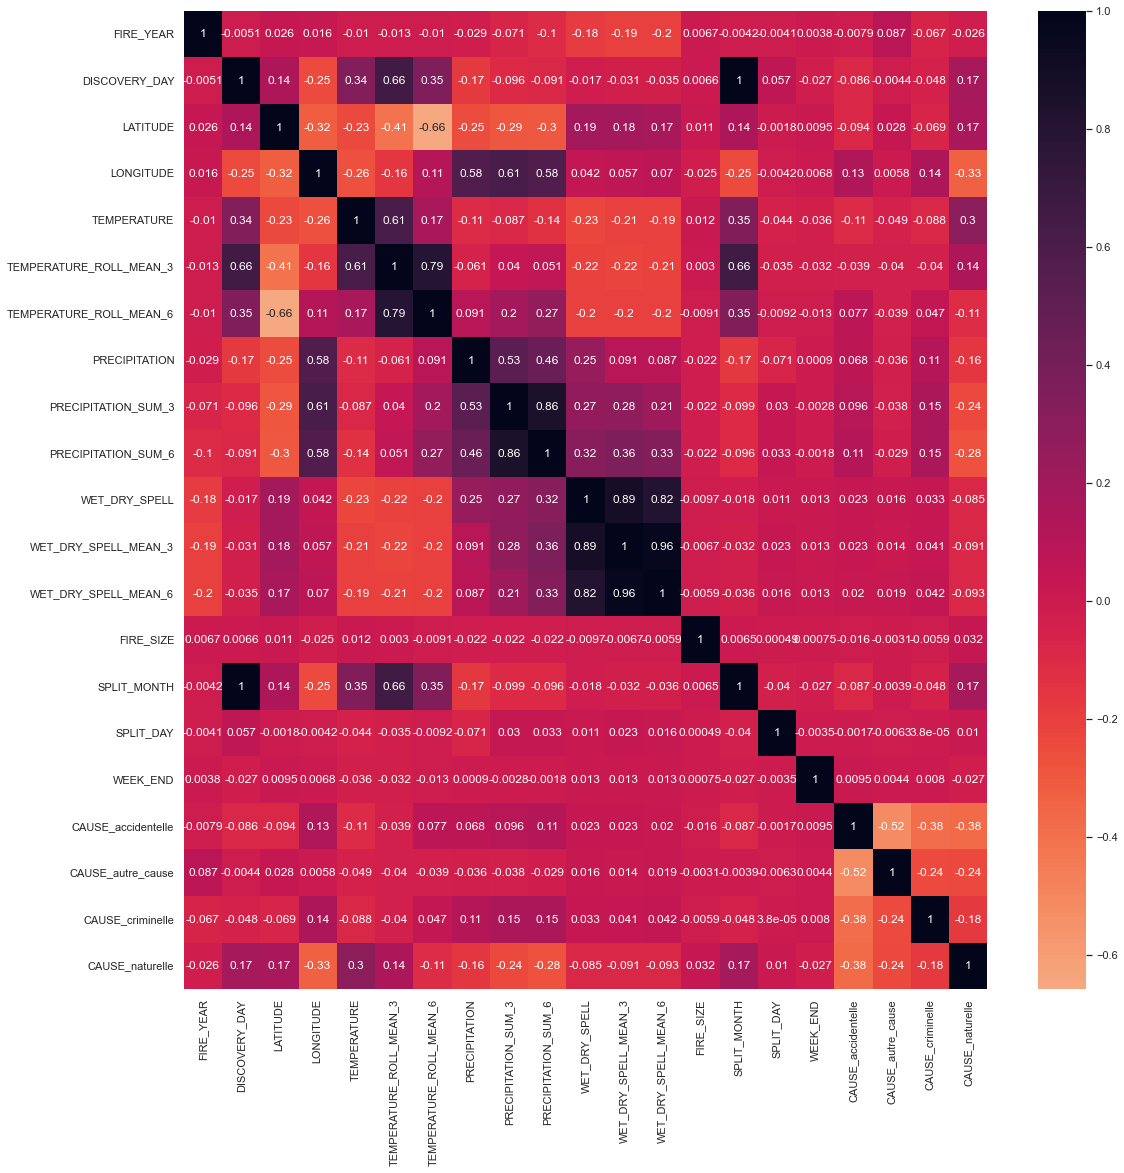

In [94]:
# Affichage de la corrélation des nouvelles variables numériques sous forme de heatmap
plt.figure(figsize=(18,18))
sns.heatmap(fires_weather.corr(), annot=True,center=0,cmap='rocket_r')
plt.show()

## Nombre de feux et surface brûlée en fonction de la température sur les 5 premiers états concernés

In [95]:
top_5_state = fires_weather[(fires_weather.STATE == 'CA') | (fires_weather.STATE == 'GA') | (fires_weather.STATE == 'TX') | (fires_weather.STATE == 'NC') | (fires_weather.STATE == 'FL')]
top_5_state

STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE        DAY  FIRE_YEAR  \
46686      Miscellaneous               A    CA   Thursday       1992   
46790              Arson               A    CA     Monday       1992   
46791      Miscellaneous               A    CA   Saturday       1992   
46792      Miscellaneous               A    CA    Tuesday       1992   
46793           Campfire               B    CA     Sunday       1992   
...                  ...             ...   ...        ...        ...   
1852430    Miscellaneous               B    TX   Saturday       2015   
1852553    Miscellaneous               B    TX  Wednesday       2015   
1852600    Miscellaneous               B    TX   Thursday       2015   
1852661    Miscellaneous               D    TX     Sunday       2015   
1852674    Miscellaneous               B    TX     Monday       2015   

         DISCOVERY_DAY   LATITUDE   LONGITUDE  TEMPERATURE  \
46686               16  34.171667 -117.670000         6.22   
46790                6  34.341667 -118.106667         6.22   
46791               18  34.440000 -118.145000         6.22   
46792               21  34.293333 -118.360000         6.22   
46793               26  34.388333 -118.456667         6.22   
...                ...        ...         ...          ...   
1852430            360  32.495088  -99.737052        10.83   
1852553            357  32.851866  -94.890111        10.83   
1852600            358  32.406052  -95.878887        10.83   
1852661            354  35.502896 -100.403709        10.83   
1852674            341  34.137383  -98.668342        10.83   

         TEMPERATURE_ROLL_MEAN_3  ...  SPLIT_MONTH  SPLIT_DAY  \
46686                      10.69  ...            1         16   
46790                      10.69  ...            1          6   
46791                      10.69  ...            1         18   
46792                      10.69  ...            1         21   
46793                      10.69  ...            1         26   
...                          ...  ...          ...        ...   
1852430                    20.32  ...           12         26   
1852553                    20.32  ...           12         23   
1852600                    20.32  ...           12         24   
1852661                    20.32  ...           12         20   
1852674                    20.32  ...           12          7   

         concat_state_year_month         CAUSE  WET_DRY_SPELL_CLASS  WEEK_END  \
46686                  CA-1992-1   autre_cause    secheresse severe         0   
46790                  CA-1992-1    criminelle    secheresse severe         0   
46791                  CA-1992-1   autre_cause    secheresse severe         1   
46792                  CA-1992-1   autre_cause    secheresse severe         0   
46793                  CA-1992-1  accidentelle    secheresse severe         1   
...                          ...           ...                  ...       ...   
1852430               TX-2015-12   autre_cause     humidité extreme         1   
1852553               TX-2015-12   autre_cause     humidité extreme         0   
1852600               TX-2015-12   autre_cause     humidité extreme         0   
1852661               TX-2015-12   autre_cause     humidité extreme         1   
1852674               TX-2015-12   autre_cause     humidité extreme         0   

         CAUSE_accidentelle CAUSE_autre_cause  CAUSE_criminelle  \
46686                     0                 1                 0   
46790                     0                 0                 1   
46791                     0                 1                 0   
46792                     0                 1                 0   
46793                     1                 0                 0   
...                     ...               ...               ...   
1852430                   0                 1                 0   
1852553                   0                 1                 0   
1852600                   0              

In [96]:
#top_5_state.groupby(['STATE','FIRE_YEAR','TEMPERATURE_MEAN']).agg({'FIRE_SIZE':['sum','count']})
top_5_state_gp = top_5_state.groupby(['STATE','FIRE_YEAR','TEMPERATURE','FIRE_SIZE_CLASS']).size().reset_index()
top_5_state_gp['STATE'] = top_5_state_gp['STATE'].replace({'CA':1,'GA':2,'TX':3,'NC':4,'FL':5})
top_5_state_gp['FIRE_SIZE_CLASS'] = top_5_state_gp['FIRE_SIZE_CLASS'].replace({'A':200,'B':400,'C':600,'D':800,'E':1000,'F':1200,'G':1400})
top_5_state_gp = top_5_state_gp.rename(columns={'FIRE_SIZE_CLASS':'SURFACE', 0:'NB_FEUX'})
top_5_state_gp

STATE  FIRE_YEAR  TEMPERATURE  SURFACE  NB_FEUX
0         1       1992         4.61      200       64
1         1       1992         4.61      400       31
2         1       1992         4.61      600        6
3         1       1992         6.22      200       48
4         1       1992         6.22      400       39
...     ...        ...          ...      ...      ...
6825      3       2015        28.50      600      177
6826      3       2015        28.50      800       26
6827      3       2015        28.50     1000       16
6828      3       2015        28.50     1200       11
6829      3       2015        28.50     1400        5

[6830 rows x 5 columns]

Loading BokehJS ...

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


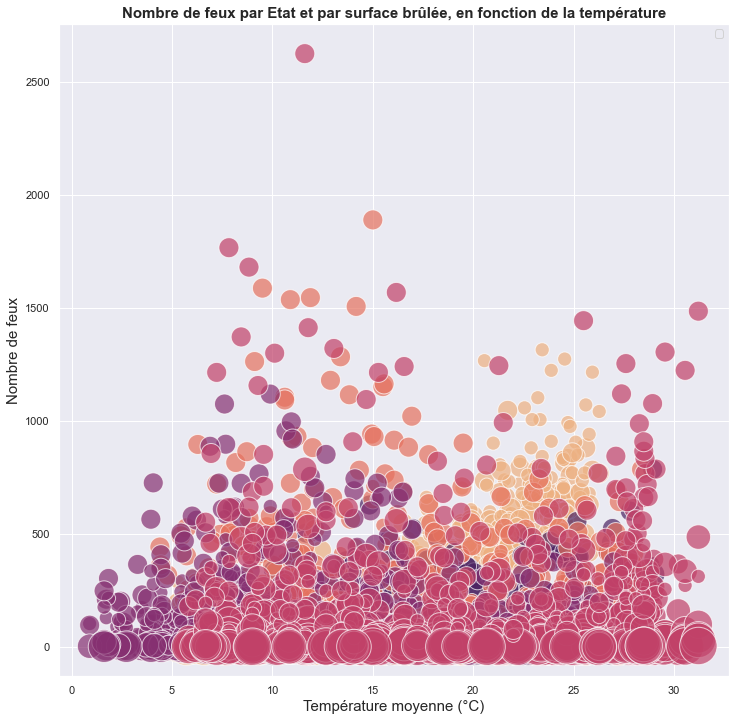

In [97]:
#GRAPH
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_notebook
output_notebook()


x = top_5_state_gp['TEMPERATURE']
y = top_5_state_gp['NB_FEUX']
s = top_5_state_gp['SURFACE'].astype('int')
c = top_5_state_gp['STATE']

plt.figure(figsize=(12,12))

def color_(x):
    State=[1,2,3,4,5]
    color=['yellow','skyblue','red','green','purple']
    return color[State.index(x)]

top_5_state_gp['color'] = top_5_state_gp['STATE'].apply(color_)


plt.scatter(
    x=x,
    y=y,
    s=s,
    c=c,
    cmap='flare',
    alpha=0.7,
    edgecolors='white'
    )

hover = HoverTool(
    tooltips = [
        ("Température °C", "@TEMPERATURE"),   
        ("Surface (km²)", "@SURFACE"),
        ("Nombre de feux", "@NB_FEUX"),
        ]
    )

plt.xlabel('Température moyenne (°C)', fontsize=15)
plt.ylabel('Nombre de feux', fontsize=15)
plt.legend()
plt.title('Nombre de feux par Etat et par surface brûlée, en fonction de la température',fontsize=15,fontweight='bold')
plt.show()

In [98]:
#GRAPH
x = top_5_state_gp['TEMPERATURE']
y = top_5_state_gp['NB_FEUX']
s = top_5_state_gp['SURFACE']
c = top_5_state_gp['STATE']

p = figure(plot_width=600,plot_height=600)

r = p.circle(
    x,
    y,
    size=50,
    color='crimson',
    hover_color='skyblue',
    hover_alpha=0.5
    )

tooltips=[
    ("Etat","$top_5_state_gp['FIRE_YEAR']"),
    ("Température (°C)","$x"),
    ]

h = HoverTool(renderers=[r], tooltips=tooltips)

p.add_tools(h)

show(p)

In [99]:
top_5_st_gp = top_5_state.groupby(['STATE','FIRE_YEAR','TEMPERATURE','FIRE_SIZE_CLASS']).size().reset_index()
top_5_st_gp['STATE'] = top_5_st_gp['STATE'].replace({'CA':1,'GA':2,'TX':3,'NC':4,'FL':5})
top_5_st_gp['FIRE_SIZE_CLASS'] = top_5_st_gp['FIRE_SIZE_CLASS'].replace({'A':200,'B':400,'C':600,'D':800,'E':1000,'F':1200,'G':1400})
top_5_st_gp = top_5_st_gp.rename(columns={'FIRE_SIZE_CLASS':'SURFACE', 0:'NB_FEUX'})
top_5_st_gp

STATE  FIRE_YEAR  TEMPERATURE  SURFACE  NB_FEUX
0         1       1992         4.61      200       64
1         1       1992         4.61      400       31
2         1       1992         4.61      600        6
3         1       1992         6.22      200       48
4         1       1992         6.22      400       39
...     ...        ...          ...      ...      ...
6825      3       2015        28.50      600      177
6826      3       2015        28.50      800       26
6827      3       2015        28.50     1000       16
6828      3       2015        28.50     1200       11
6829      3       2015        28.50     1400        5

[6830 rows x 5 columns]

In [100]:
from bokeh.transform import linear_cmap
from bokeh.palettes import Inferno256 as palette
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.models.tools import HoverTool
# onglets dans le graph ==> from bokeh.models.widgets import Panel, Tabs


def color_(x):
    State=[1,2,3,4,5]
    color=['yellow','skyblue','red','green','purple']
    return color[State.index(x)]

top_5_st_gp['color'] = top_5_st_gp['STATE'].apply(color_)


hover = HoverTool(
    tooltips = [
        ("Température °C", "@TEMPERATURE"),   
        ("Surface (km²)", "@SURFACE"),
        ("Nombre de feux", "@NB_FEUX"),
        ]
    )


p1 = figure(plot_width=600, plot_height=600,x_axis_label='Température(°C)',y_axis_label='Nombre_de_feux')
p1.circle(x='TEMPERATURE',y='NB_FEUX',source=top_5_st_gp,color='color',fill_alpha=0.6)
p1.add_tools(hover)

show(p1)

In [101]:
fires_weather

STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE       DAY  FIRE_YEAR  \
51874     Debris Burning               B    AL  Saturday       1992   
51875      Miscellaneous               B    AL    Sunday       1992   
51893              Arson               B    AL  Thursday       1992   
51894              Arson               B    AL  Thursday       1992   
51895              Arson               B    AL    Friday       1992   
...                  ...             ...   ...       ...        ...   
1804180   Debris Burning               C    WY    Friday       2015   
1808353        Fireworks               A    WY    Friday       2015   
1817808         Campfire               A    WY  Saturday       2015   
1829530   Debris Burning               B    WY  Saturday       2015   
1849633    Miscellaneous               A    WY  Thursday       2015   

         DISCOVERY_DAY   LATITUDE  LONGITUDE  TEMPERATURE  \
51874               25  33.833333  -85.60000         6.72   
51875               26  33.550000  -85.70000         6.72   
51893               16  33.383333  -86.00000         6.72   
51894               16  33.533333  -86.00000         6.72   
51895               31  33.566667  -85.80000         6.72   
...                ...        ...        ...          ...   
1804180            338  41.965700 -105.19343        -5.89   
1808353            338  42.815900 -106.28100        -5.89   
1817808            346  42.773100 -106.35470        -5.89   
1829530            339  42.821600 -106.37890        -5.89   
1849633            365  42.763200 -106.54060        -5.89   

         TEMPERATURE_ROLL_MEAN_3  ...  SPLIT_MONTH  SPLIT_DAY  \
51874                        NaN  ...            1         25   
51875                        NaN  ...            1         26   
51893                        NaN  ...            1         16   
51894                        NaN  ...            1         16   
51895                        NaN  ...            1         31   
...                          ...  ...          ...        ...   
1804180                     7.65  ...           12          4   
1808353                     7.65  ...           12          4   
1817808                     7.65  ...           12         12   
1829530                     7.65  ...           12          5   
1849633                     7.65  ...           12         31   

         concat_state_year_month         CAUSE   WET_DRY_SPELL_CLASS  \
51874                  AL-1992-1  accidentelle  secheresse ordinaire   
51875                  AL-1992-1   autre_cause  secheresse ordinaire   
51893                  AL-1992-1    criminelle  secheresse ordinaire   
51894                  AL-1992-1    criminelle  secheresse ordinaire   
51895                  AL-1992-1    criminelle  secheresse ordinaire   
...                          ...           ...                   ...   
1804180               WY-2015-12  accidentelle  secheresse naissante   
1808353               WY-2015-12  accidentelle  secheresse naissante   
1817808               WY-2015-12  accidentelle  secheresse naissante   
1829530               WY-2015-12  accidentelle  secheresse naissante   
1849633               WY-2015-12   autre_cause  secheresse naissante   

         WEEK_END  CAUSE_accidentelle CAUSE_autre_cause  CAUSE_criminelle  \
51874           1                   1                 0                 0   
51875           1                   0                 1                 0   
51893           0                   0                 0                 1   
51894           0                   0                 0                 1   
51895           0                   0                 0                 1   
...           ...                 ...               ...               ...   
1804180         0                   1                 0                 0   
1808353         0                   1                 0                 0   
1817808         1                   1                 0                 0   
182953

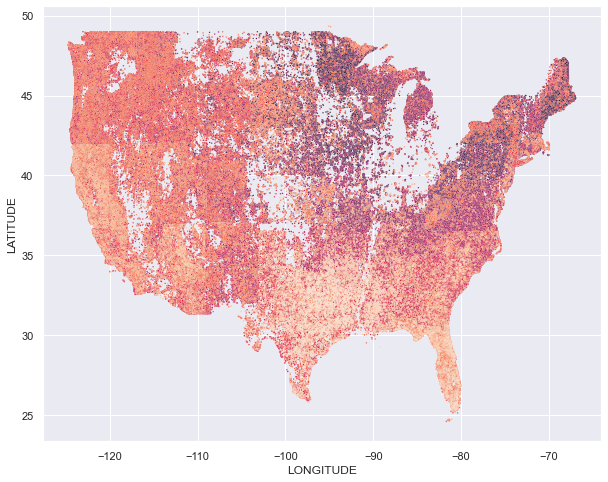

In [132]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=fires_weather, x='LONGITUDE', y='LATITUDE', palette='rocket', hue='TEMPERATURE_ROLL_MEAN_3', legend=False)
#plt.scatter(centroids[:, 0],centroids[:, 1], s=100, c='black', label='Centroids', marker='*')
plt.show()

In [111]:
import geopandas as gpd

In [117]:
us_cities = gpd.read_csv('uscities.csv', sep=';')
us_cities

  Created wheel for graphics.py: filename=graphics.py-5.0.1.post1-py3-none-any.whl size=10077 sha256=2d2be9c803a96c437010555bae992f3673050dab2127202ea6281955444e3206
  Stored in directory: c:\users\paulo\appdata\local\pip\cache\wheels\88\b0\77\cca48b98c4276e3293f08d083f7ac4633f6a0de31d3612ca5e
Successfully built graphics.py
Note: you may need to restart the kernel to use updated packages.


In [120]:
#gdf = geopandas.GeoDataFrame(fires_weather, geometry=geopandas.points_from_xy(fires_weather.LONGITUDE, fires_weather.LATITUDE))

#geo_fires_weather = fires_weather.gpd

from graphics import Point

fires_weather['Coordinates'] = Point(x=fires_weather.LONGITUDE, y=fires_weather.LATITUDE)


#fires_weather['Coordinates'] = fires_weather['Coordinates'].apply(Point)

#gdf = geopandas.GeoDataFrame(fires_weather, geometry='Coordinates')

TypeError: cannot convert the series to <class 'float'>

In [ ]:
gdf.plot(column='gdp_per_cap', cmap='OrRd');